In [53]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import sys
from ipywidgets import interactive, FloatSlider, interact, fixed
from divtel import *


import copy
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_sky
from astroplan import FixedTarget
#from . import utils
#from .const import COLORS
#from . import pointing

from matplotlib.transforms import Affine2D
from astropy.visualization.wcsaxes import SphericalCircle

import healpy as hp
import tqdm

#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
from divtel import *
#from ctadiv.ArrayConfig import *

from astropy.coordinates import get_icrs_coordinates

## Load a CTA configuration

In [55]:
cta = CTA_Info('south')

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2024-11-18T11:52:39.602


In [56]:
!pwd
!cd /Users/macbook/divtel/examples/config/test_config.txt
!ls

/Users/macbook/divtel
/bin/bash: line 0: cd: /Users/macbook/divtel/examples/config/test_config.txt: No such file or directory
CONTRIBUTING.md
Confronting_full_vs_subarray.ipynb
LICENSE
LaPalmaArrayPositions_divProd6-Copy1.txt
LaPalmaArrayPositions_divProd6.txt
ParanalArrayPositions_divProd6.txt
Paranal_only_MST.txt
Paranal_only_SST.txt
README.md
array_1_ZENITH_20.png
array_1_ZENITH_40.png
array_1_ZENITH_60.png
array_ZENITH_20.png
array_display_read_pointings-Copy1.ipynb
array_display_read_pointings-Copy2.ipynb
array_display_read_pointings.ipynb
codemeta.json
config
different_telescopes.png
divtel
divtel.egg-info
docs
environment.yml
examples
hfov_evolution
setup.py
subarray_1_SOUTH.txt
subarray_2_SOUTH.txt
trying_different_zenith-3.ipynb


In [57]:
!pwd

/Users/macbook/divtel


In [58]:
# Note that if the radius is in meters, 
# you can set LoadConfig(file, radius="meters")
# defalut is in degrees

array = LoadConfig("/Users/macbook/divtel/ParanalArrayPositions_divProd6.txt", frame=cta)
full_array= LoadConfig("/Users/macbook/divtel/Paranal_only_MST.txt", frame=cta)

## Check configuration table

In [7]:
array.table.units = "deg"
array.table
full_array.table

<Table length=14>
  id     x       y       z       az   ...   p_x     p_y     p_z    d_tel 
         m       m       m      rad   ...                            m   
int64 float64 float64 float64 float64 ... float64 float64 float64 float64
----- ------- ------- ------- ------- ... ------- ------- ------- -------
    1     0.0     0.0    24.0   0.000 ...   1.000  -0.000   0.000   22.65
    2     0.0   151.0    25.0   0.000 ...   1.000  -0.000   0.000  152.67
    3     0.0  -151.0    31.0   0.000 ...   1.000  -0.000   0.000  152.68
    4   150.0    75.0    21.0   0.000 ...   1.000  -0.000   0.000  188.09
    5   150.0   -75.0    26.0   0.000 ...   1.000  -0.000   0.000  187.98
    6   150.0   240.0    24.0   0.000 ...   1.000  -0.000   0.000  295.50
    7   150.0  -240.0    30.0   0.000 ...   1.000  -0.000   0.000  295.49
    8   313.0     0.0    19.0   0.000 ...   1.000  -0.000   0.000  335.47
    9  -150.0   -75.0    28.0   0.000 ...   1.000  -0.000   0.000  148.05
   10  -150.0    75.0    28.0   0.000 ...   1.000  -0.000   0.000  148.05
   11  -150.0  -240.0    38.5   0.000 ...   1.000  -0.000   0.000  272.05
   12  -150.0   240.0    27.0   0.000 ...   1.000  -0.000   0.000  271.83
   13  -313.0  -162.0    35.0   0.000 ...   1.000  -0.000   0.000  332.82
   14  -313.0   162.0    30.5   0.000 ...   1.000  -0.000   0.000  332.75

In [8]:
table=array.table

## Check the telescope spatial distribution
This is useful to pick the groups

In [9]:
array.table

<Table length=64>
  id     x       y       z       az   ...   p_x     p_y     p_z    d_tel 
         m       m       m      deg   ...                            m   
int64 float64 float64 float64 float64 ... float64 float64 float64 float64
----- ------- ------- ------- ------- ... ------- ------- ------- -------
    1   -20.0   -65.0    34.0   0.000 ...   1.000  -0.000   0.000   66.52
    2    80.0     0.0    29.0   0.000 ...   1.000  -0.000   0.000   86.67
    3   -20.0    65.0    31.0   0.000 ...   1.000  -0.000   0.000   66.37
    4  -120.0     0.0    33.0   0.000 ...   1.000  -0.000   0.000  113.39
    5     0.0     0.0    24.0   0.000 ...   1.000  -0.000   0.000    8.55
    6     0.0   151.0    25.0   0.000 ...   1.000  -0.000   0.000  151.21
    7     0.0  -151.0    31.0   0.000 ...   1.000  -0.000   0.000  151.16
    8   150.0    75.0    21.0   0.000 ...   1.000  -0.000   0.000  173.90
    9   150.0   -75.0    26.0   0.000 ...   1.000  -0.000   0.000  173.73
  ...     ...     ...     ...     ... ...     ...     ...     ...     ...
   56   748.0   367.0    6.25   0.000 ...   1.000  -0.000   0.000  839.50
   57   816.0  -648.0   41.25   0.000 ...   1.000  -0.000   0.000 1047.30
   58   816.0   648.0   18.75   0.000 ...   1.000  -0.000   0.000 1047.28
   59     0.0  -950.0   75.25   0.000 ...   1.000  -0.000   0.000  951.13
   60     0.0   950.0   28.25   0.000 ...   1.000  -0.000   0.000  950.02
   61  -955.0  -199.0   39.25   0.000 ...   1.000  -0.000   0.000  969.03
   62  -955.0   199.0   22.75   0.000 ...   1.000  -0.000   0.000  969.01
   63   955.0  -199.0    7.75   0.000 ...   1.000  -0.000   0.000  982.28
   64   955.0   199.0    5.25   0.000 ...   1.000  -0.000   0.000  982.34

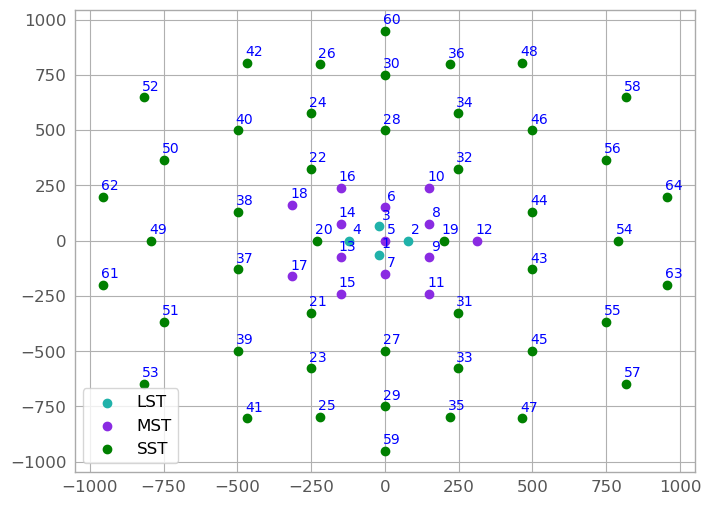

In [10]:
# Loop through all the telescopes
#for fov in array.table["fov"]:
#    print(fov)
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
for i in range(len(array.table)):
    plt.scatter(array.table['x'][i], array.table['y'][i], c=colors[i], label=fov_labels[colors[i]])

    # Annotate each point with the telescope ID
    #matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)
#Annotate the point xy with text text.
#In the simplest form, the text is placed at xy.
    plt.annotate(str(array.table["id"][i]),
                 (array.table['x'][i], array.table['y'][i]),  # Point position
                 textcoords="offset points",  # Text position relative to the point
                 xytext=(5, 5),  # Offset in pixels (to avoid overlapping the point)
                 ha='center', fontsize=10, color='blue')
handles, labels = plt.gca().get_legend_handles_labels()
#handles, labels like this is doing
    #plt.gca() gets the current Axes object, which is where your plot is
    #.get_legend_handles_labels()
        #handles: Returns a list of the graphical elements (e.g., lines, scatter plot points) that would appear in the legend.
        # labels: Returns the text labels associated with each graphical element in handles

by_label = dict(zip(labels, handles))  # Remove duplicate labels, the dictionary by the structure takes out the double 
plt.legend(by_label.values(), by_label.keys())
#by_label.values This is pulling out the unique graphical elements
# by_label.keys  This is retrieving the unique text 
plt.savefig("./different_telescopes.png", dpi=300, bbox_inches="tight")
plt.show() 

## Check the hyper field of view (hFoV)

This is the whole telescope array hFoV maybe? (ask)

In [11]:
array.hFoV(m_cut=3) 

64it [00:09,  6.76it/s]


(62.238869377690584, 57.415086388537716)

In [12]:
#array.hFoV(m_cut=3)

## Grouping telescopes

In [13]:
sub_groups={'1':[5,6,13,14], 
            '2': [15,17],
            '3': [16,18], 
            '4': [12,10,8],
           '5': [11,9,7]}
sub_groups_2 = {'1':[18,17,16,14], 
                '2': [13,15,5,7],
                '3': [6,8,10],
                '4': [9,11,12]
              }
#only_MST={'1':[5,6,8,11], 
#            '2': [10,7,9]}

## DEFINING THE NEW MULTIPLICITY PLOT WITH SUBARRAY 

In [14]:
def multiplicity_plot_with_subarray(array, number_of_telescopes_subarray, fig=None): #I have to give it to it the number of telescopes in a given subarray
 #number_of_telescopes_subarray_1  
    nside = 512
    map_multiplicity = np.zeros(hp.nside2npix(nside), dtype=np.int8)
    counter = np.arange(0, hp.nside2npix(nside))
    ra, dec = hp.pix2ang(nside, counter, True, lonlat=True)
    coordinate = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
    coord = array.get_pointing_coord(icrs=False)
    for i in tqdm.tqdm(range(len(array.telescopes))):
        pointing = SkyCoord(ra=coord.az[i].degree, dec=coord.alt[i].degree, unit='deg')
        r_fov = np.arctan((array.telescopes[i].camera_radius/array.telescopes[i].focal).to(u.dimensionless_unscaled)).to(u.deg)
        mask = coordinate.separation(pointing) < r_fov
        map_multiplicity[mask] += 1*number_of_telescopes_subarray[i]
        
    
    R=np.sqrt(array.hFoV()[0]/np.pi) + 5
    hp.cartview(map_multiplicity, rot=[array.pointing["az"].value, array.pointing["alt"].value],
                lonra=[-R,R], latra=[-R,R], nest=True, cmap='viridis', title=f"{array.frame.site} div={array.div} average_zenith={round(np.mean(array.table['zn']))}")
    # Annotate with axis labels:
    plt.annotate('Right Ascension (degrees)', xy=(0.5, -0.05), xycoords='axes fraction', ha='center', va='center')
    plt.annotate('Declination (degrees)', 
                 xy=(-0.05, 0.5), xycoords='axes fraction', 
                 ha='center', va='center', rotation='vertical')
    hp.graticule(dpar=5, dmer=5, coord='G', color='gray', lw=0.5)
    
    plt.show()


## DEFINING THE hFoV

In [15]:
 def hFoV_multiplicity(self, number_of_telescopes_subarray, m_cut=0, return_multiplicity=False, full_output=False):
        """
        Return a hyper field of view (hFoV) above a given multiplicity.
    
        Parameters
        ----------
        m_cut: float, optional
            the minimum multiplicity
        return_multiplicity: bool, optional
            return average and variance of multiplicity
        full_output: bool, optional
            return all parameters; multiplicity, overlaps, geoms
        Returns
        -------
        fov: float
            hFoV
        m_ave: float
            average of multiplicity
       
        """
        if self.table.units == 'rad':
            self.__convert_units__(toDeg=True)
        
        coord = self.get_pointing_coord(icrs=False)
        nside = 512
        map_multiplicity = np.zeros(hp.nside2npix(nside), dtype=np.int8)
        counter = np.arange(0, hp.nside2npix(nside))
        ra, dec = hp.pix2ang(nside, counter, True, lonlat=True)
        coordinate = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)
        for i in tqdm.tqdm(range(len(self.telescopes))):
            pointing = SkyCoord(ra=coord.az[i].degree, dec= coord.alt[i].degree, unit='deg')
            r_fov = np.arctan((self.telescopes[i].camera_radius/self.telescopes[i].focal).to(u.dimensionless_unscaled)).to(u.deg)
            mask = coordinate.separation(pointing) < r_fov
            map_multiplicity[mask] += 1*number_of_telescopes_subarray[i]

       
        mask_fov = map_multiplicity> m_cut
        #mask_fov_eff = map_multiplicity>3

        hfov = hp.nside2pixarea(nside, True)*np.sum(mask_fov)
        m_ave = np.mean(map_multiplicity[mask_fov])
        return hfov, m_ave     

#trying to debug to s=understand why I got that 0
labels = []
j = 1  # Group counter
number_of_telescopes_subarray=[]
size_of_array = len(array._table)
print(size_of_array)
size_of_group = len(sub_groups)
grouping_array = np.zeros(size_of_array) 
print(grouping_array)
#print(size_of_array)
for key, indices in sub_groups.items():
  
    labels.append(key)
    #int_result = np.array(key).astype(int).item()
    #print(int_result)
    l= 0
    for idx in indices:
        l += 1
        #print(idx)
        if idx-1 < size_of_array:
            grouping_array[idx-1] = j 
        print(j, '1')
    number_of_telescopes_subarray.append(l)
    if j+1 <= size_of_group:
        j +=1
    print(grouping_array)
    print(j)
    tel_group = array._table.group_by(np.asarray(grouping_array))
    #print(l)
number_of_telescopes_subarray
tel_group
#grouping_array



new_telescopes = []
for group in tel_group.groups[1:]:  # This will skip the first group (index 0)
   # print(group)  # Print the group
    #print(group['focal'][0], round(group['radius'][0], 2))
    #print(group['focal'][2], round(group['radius'][2], 2))
    print("Group:", group)  # Print the entire group to inspect its structure
    print("Focal:", group['focal'])  # Check if it's a scalar or array/list
    print("Radius:", group['radius'])  # Check if it's a scalar or array/list
    cog = compute_center_of_gravity(group)
    focal, fov = group['focal'], round(group['radius'], 2)  # Assuming same within a group
    new_telescopes.append([*cog, focal, fov])

new_telescopes

In [16]:
tel_group, labels_1, number_of_telescopes_subarray_1  =group_by(array, group=sub_groups) 
tel_group

NameError: name 'group_by' is not defined

In [17]:
def group_by_existing_array(telescope_table, group):
    size_of_array = len(self._table)
    grouping_array = np.zeros(size_of_array)  # Initialize group labels to 0
    labels = []
    j = 1  # Group counter
    number_of_telescopes_subarray=[]
    for key, indices in group.items():
        labels.append(key) #labels are like 1,2,3,4
        index_of_sub_telescope= 0 #we start it at 0
        for idx in indices: #here I am working witht the ones inside 
            index_of_sub_telescope += 1 #so everytime it goes inside it goes the counter 
            if idx - 1 < size_of_array:  # Ensure index is within 
                grouping_array[idx - 1] = j  # Assign group number
        number_of_telescopes_subarray.append(index_of_sub_telescope) #Appending the final number, so we get in theory the multiplicity
        j += 1

        # Group by the constructed grouping array
        tel_group = self._table.group_by(np.asarray(grouping_array))
        return tel_group, labels,indices, number_of_telescopes_subarray

    # Handle sub_groups if provided
    if sub_groups is not None and isinstance(sub_groups, dict):
        for sub_key, indices in sub_groups.items():
            if sub_key not in labels:
                labels.append(sub_key)
            for index in indices:
                if index - 1 < size_of_array:  # Ensure index is within bounds
                    groupping[index - 1] = j  # Assign new group number
            j += 1

    print("Final Groupping array:", groupping)
    
    try:
        tel_group = telescope_table.group_by(np.asarray(groupping))
    except ValueError as e:
        print("Error in grouping:", e)
        raise ValueError("An issue occurred in creating tel_group with provided grouping arrays.")
    
    return tel_group, labels
def group_by(self, group):
    # Case when group is None or empty
    if group is None or (isinstance(group, np.ndarray) and group.size == 0):
        return self._table.group_by(np.zeros(len(self._table))), ["_nolegend_"]

    
    # Handle case where group is a dictionary (for sub_groups)
    elif isinstance(group, dict):
        size_of_array = len(self._table)
        grouping_array = np.zeros(size_of_array)  # Initialize group labels to 0
        labels = []
        size_of_group = len(group)
        j = 1  # Group counter
        number_of_telescopes_subarray=[]
        for key, indices in group.items():
            labels.append(key) #labels are like 1,2,3,4
            index_of_sub_telescope= 0 #we start it at 0
            for idx in indices: #here I am working witht the ones inside 
                index_of_sub_telescope += 1 #so everytime it goes inside it goes the counter 
                if idx - 1 < size_of_array:  # Ensure index is within bounds
                    grouping_array[idx - 1] = j  # Assign group number
            number_of_telescopes_subarray.append(index_of_sub_telescope) #Appending the final number, so we get in theory the multiplicity
            if j + 1 <= size_of_group:
                j += 1

        # Group by the constructed grouping array
        tel_group = self._table.group_by(np.asarray(grouping_array))
        return tel_group, labels, number_of_telescopes_subarray

    # Handle case for grouping by a column name (string)
    #elif isinstance(group, str):
    #    tel_group = self._table.group_by(group)
    #    labels = ["group_{}".format(i + 1) for i in range(len(tel_group.groups))]
    #    return tel_group, labels

    # If none of the above cases are met, handle it
    raise ValueError("Invalid group input provided.")
   
def compute_center_of_gravity(group):
    x, y, z = group['x'], group['y'], group['z']
    cog_x = round(np.mean(x),2)
    cog_y = round(np.mean(y),2)
    cog_z = round(np.mean(z),2)
    return cog_x, cog_y, cog_z

# Function to create new telescope list with center of gravity
def create_new_group_list(tel_group):
    new_telescopes = []
    for group in tel_group.groups:
        print(tel_group.groups)
        print (group['focal'][0],round(group['radius'][0],2))
        #id_ = group["id"][0]
        cog = compute_center_of_gravity(group)
        focal, fov = group['focal'][0], round(group['radius'][0],2)  # Assuming same within a group
        new_telescopes.append([*cog, focal, fov])
    return new_telescopes


In [18]:
tel_group_2, labels_2, number_of_telescopes_subarray_2 =array.group_by(sub_groups_2)
#tel_group_3, labels_3 = group_by(array, group=only_MST)

In [19]:
tel_group, labels, number_of_telescopes_subarray_1 =array.group_by(sub_groups)

In [20]:
# Step 2: Create new telescope list with center of gravity
new_telescopes = create_new_group_list(tel_group)
new_telescopes_2 = create_new_group_list(tel_group_2)
#new_telescopes_3 = create_new_group_list(tel_group_3)
#Why are you creating an extra telescope?


<TableGroups indices=[ 0 50 54 56 58 61 64]>
28.0 2.15
<TableGroups indices=[ 0 50 54 56 58 61 64]>
16.0 3.85
<TableGroups indices=[ 0 50 54 56 58 61 64]>
16.0 3.85
<TableGroups indices=[ 0 50 54 56 58 61 64]>
16.0 3.85
<TableGroups indices=[ 0 50 54 56 58 61 64]>
16.0 3.85
<TableGroups indices=[ 0 50 54 56 58 61 64]>
16.0 3.85
<TableGroups indices=[ 0 50 54 58 61 64]>
28.0 2.15
<TableGroups indices=[ 0 50 54 58 61 64]>
16.0 3.85
<TableGroups indices=[ 0 50 54 58 61 64]>
16.0 3.85
<TableGroups indices=[ 0 50 54 58 61 64]>
16.0 3.85
<TableGroups indices=[ 0 50 54 58 61 64]>
16.0 3.85


In [21]:
#del new_telescopes[0]# Step 3: Output the result
#for telescope in new_telescopes:
#    print(telescope)
del new_telescopes[0]#No clue why it keeps on putting me an extra telescope...soooo... I deleted it... I will find out why
for telescope in new_telescopes:
    print(telescope)

[-75.0, 37.75, 26.25, 16.0, 3.85]
[-231.5, -201.0, 36.75, 16.0, 3.85]
[-231.5, 201.0, 28.75, 16.0, 3.85]
[204.33, 105.0, 21.33, 16.0, 3.85]
[100.0, -155.33, 29.0, 16.0, 3.85]


In [22]:
del new_telescopes_2[0]
for telescope in new_telescopes_2:
    print(telescope)


[-231.5, 78.75, 30.12, 16.0, 3.85]
[-75.0, -116.5, 30.38, 16.0, 3.85]
[100.0, 155.33, 23.33, 16.0, 3.85]
[204.33, -105.0, 25.0, 16.0, 3.85]


In [23]:
#for telescope in new_telescopes_3:
#    print(telescope)
    #WHY 3???????????

In [24]:
# Define the file path where you want to save the output
output_file_path = './subarray_1_SOUTH.txt'

# Open the file in write mode
with open(output_file_path, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path}")


New telescope data has been written to ./subarray_1_SOUTH.txt


In [25]:
range(len(array.telescopes))

range(0, 64)

In [26]:
# Define the file path where you want to save the output
output_file_path_2 = 'subarray_2_SOUTH.txt'

# Open the file in write mode
with open(output_file_path_2, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes_2):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path_2}")


New telescope data has been written to subarray_2_SOUTH.txt


# Diverging subarrays

In [27]:
array = LoadConfig("./subarray_1_SOUTH.txt", frame=cta, pointing2src=True)
array_ALT_1 = LoadConfig("./subarray_1_SOUTH.txt", frame=cta, pointing2src=True)
array_2 = LoadConfig("./subarray_2_SOUTH.txt", frame=cta, pointing2src=True)
#array_3= LoadConfig("./subarray_telescope_only_MST.txt", frame=cta, poinitng2src=True)

In [28]:
print(number_of_telescopes_subarray_1)

[4, 2, 2, 3, 3]


In [29]:
div=0.000
alt_1=70
alt_2=50
alt_3=30
az=0

In [30]:
array.table

<Table length=5>
  id     x       y       z       az   ...   p_x     p_y     p_z    d_tel 
         m       m       m      rad   ...                            m   
int64 float64 float64 float64 float64 ... float64 float64 float64 float64
----- ------- ------- ------- ------- ... ------- ------- ------- -------
    1   -75.0   37.75   26.25   0.000 ...   1.000  -0.000   0.000   49.24
    2  -231.5  -201.0   36.75   0.000 ...   1.000  -0.000   0.000  271.30
    3  -231.5   201.0   28.75   0.000 ...   1.000  -0.000   0.000  274.88
    4  204.33   105.0   21.33   0.000 ...   1.000  -0.000   0.000  273.21
    5   100.0 -155.33    29.0   0.000 ...   1.000  -0.000   0.000  211.86

In [39]:
print(array.hFoV(subarray_mult=number_of_telescopes_subarray_1,m_cut=0))
hFoV_multiplicity(array, number_of_telescopes_subarray_1, m_cut=3)
#array_3.hFoV()

5it [00:00,  6.59it/s]


(46.580797309219754, 14.0)


100%|█████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  6.89it/s]


(46.580797309219754, 14.0)

In [35]:
number_of_telescopes_subarray_1


[4, 2, 2, 3, 3]

In [36]:
number_of_telescopes_subarray_2

[4, 4, 3, 3]

In [40]:
print(array_2.hFoV(subarray_mult=number_of_telescopes_subarray_2, m_cut=3))
hFoV_multiplicity(array_2, number_of_telescopes_subarray_2, m_cut=3)

4it [00:00,  6.33it/s]


(46.580797309219754, 14.0)


100%|█████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00,  6.70it/s]


(46.580797309219754, 14.0)

In [44]:
#array_ALT_1.divergent_pointing(div=0.000,az=az,alt=alt_1)

print(array_ALT_1.hFoV(m_cut=0))
print(array_ALT_1.hFoV(subarray_mult=number_of_telescopes_subarray_1, m_cut=3))
hFoV_multiplicity(array_ALT_1, number_of_telescopes_subarray_1, m_cut=3)

5it [00:00,  6.33it/s]


(46.580797309219754, 5.0)


5it [00:00,  6.81it/s]


(46.580797309219754, 14.0)


100%|█████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  7.00it/s]


(46.580797309219754, 14.0)

In [45]:
#array.divergent_pointing(div=0.000,az=az,alt=alt_1)
#print(array.hFoV())
#array_2.divergent_pointing(div=0.000, az=az,alt=alt_1)
#print(array_2.hFoV())
#array_3_alt_1.divergent_pointing(div, az=az, alt=alt_1)
#array.divergent_pointing(div=0.000, az=az,alt=alt_2)
#print(array.hFoV())
#array_2.divergent_pointing(div=0.000, az=az,alt=alt_2)
#print(array_2.hFoV())
#array_3_alt_2.divergent_pointing(div, az=az, alt=alt_2)
array.divergent_pointing(div=0.000, az=az,alt=alt_3)
print(array.hFoV())
array_2.divergent_pointing(div, az=az,alt=alt_3)
print(array_2.hFoV())
#array_3_alt_3.divergent_pointing(div, az=az, alt=alt_3)

5it [00:00,  6.70it/s]


(46.56768334601333, 5.0)


4it [00:00,  6.88it/s]

(46.56768334601333, 4.0)


In [46]:
array.table

<Table length=5>
  id     x       y       z       az   ...   p_x     p_y     p_z    d_tel 
         m       m       m      deg   ...                            m   
int64 float64 float64 float64 float64 ... float64 float64 float64 float64
----- ------- ------- ------- ------- ... ------- ------- ------- -------
    1   -75.0   37.75   26.25   0.000 ...   0.866  -0.000   0.500   49.24
    2  -231.5  -201.0   36.75   0.000 ...   0.866  -0.000   0.500  271.30
    3  -231.5   201.0   28.75   0.000 ...   0.866  -0.000   0.500  274.88
    4  204.33   105.0   21.33   0.000 ...   0.866  -0.000   0.500  273.21
    5   100.0 -155.33    29.0   0.000 ...   0.866  -0.000   0.500  211.86

In [47]:
array_2.table

<Table length=4>
  id     x       y       z       az   ...   p_x     p_y     p_z    d_tel 
         m       m       m      deg   ...                            m   
int64 float64 float64 float64 float64 ... float64 float64 float64 float64
----- ------- ------- ------- ------- ... ------- ------- ------- -------
    1  -231.5   78.75   30.12   0.000 ...   0.866  -0.000   0.500  243.03
    2   -75.0  -116.5   30.38   0.000 ...   0.866  -0.000   0.500  140.96
    3   100.0  155.33   23.33   0.000 ...   0.866  -0.000   0.500  182.44
    4  204.33  -105.0    25.0   0.000 ...   0.866  -0.000   0.500  231.67

In [67]:
multiplicity_plot_with_subarray(array,number_of_telescopes_subarray_1 )
array.multiplicity_plot(subarray_mult=number_of_telescopes_subarray_1 )
#array_ALT_1.multiplicity_plot()
array_ALT_1.multiplicity_plot(subarray_mult=number_of_telescopes_subarray_1 )
#plt.gcf().savefig("./no_divergence_Array_1.png", dpi=300)

  8%|██████▉                                                                                 | 5/64 [00:00<00:11,  5.34it/s]


IndexError: list index out of range

In [ ]:
array_2.multiplicity_plot(number_of_telescopes_subarray_2)

In [60]:
#array_3.multiplicity_plot()

## Divergence on zenith 20 altitude 70 

In [61]:
array_2.table

<Table length=4>
  id     x       y       z       az   ...   p_x     p_y     p_z    d_tel 
         m       m       m      deg   ...                            m   
int64 float64 float64 float64 float64 ... float64 float64 float64 float64
----- ------- ------- ------- ------- ... ------- ------- ------- -------
    1  -231.5   78.75   30.12   0.000 ...   0.866  -0.000   0.500  243.03
    2   -75.0  -116.5   30.38   0.000 ...   0.866  -0.000   0.500  140.96
    3   100.0  155.33   23.33   0.000 ...   0.866  -0.000   0.500  182.44
    4  204.33  -105.0    25.0   0.000 ...   0.866  -0.000   0.500  231.67

In [62]:
array.table

<Table length=64>
  id     x       y       z       az   ...   p_x     p_y     p_z    d_tel 
         m       m       m      rad   ...                            m   
int64 float64 float64 float64 float64 ... float64 float64 float64 float64
----- ------- ------- ------- ------- ... ------- ------- ------- -------
    1   -20.0   -65.0    34.0   0.000 ...   1.000  -0.000   0.000   66.52
    2    80.0     0.0    29.0   0.000 ...   1.000  -0.000   0.000   86.67
    3   -20.0    65.0    31.0   0.000 ...   1.000  -0.000   0.000   66.37
    4  -120.0     0.0    33.0   0.000 ...   1.000  -0.000   0.000  113.39
    5     0.0     0.0    24.0   0.000 ...   1.000  -0.000   0.000    8.55
    6     0.0   151.0    25.0   0.000 ...   1.000  -0.000   0.000  151.21
    7     0.0  -151.0    31.0   0.000 ...   1.000  -0.000   0.000  151.16
    8   150.0    75.0    21.0   0.000 ...   1.000  -0.000   0.000  173.90
    9   150.0   -75.0    26.0   0.000 ...   1.000  -0.000   0.000  173.73
  ...     ...     ...     ...     ... ...     ...     ...     ...     ...
   56   748.0   367.0    6.25   0.000 ...   1.000  -0.000   0.000  839.50
   57   816.0  -648.0   41.25   0.000 ...   1.000  -0.000   0.000 1047.30
   58   816.0   648.0   18.75   0.000 ...   1.000  -0.000   0.000 1047.28
   59     0.0  -950.0   75.25   0.000 ...   1.000  -0.000   0.000  951.13
   60     0.0   950.0   28.25   0.000 ...   1.000  -0.000   0.000  950.02
   61  -955.0  -199.0   39.25   0.000 ...   1.000  -0.000   0.000  969.03
   62  -955.0   199.0   22.75   0.000 ...   1.000  -0.000   0.000  969.01
   63   955.0  -199.0    7.75   0.000 ...   1.000  -0.000   0.000  982.28
   64   955.0   199.0    5.25   0.000 ...   1.000  -0.000   0.000  982.34

In [63]:
div=0.02
alt=70
az=0

In [64]:
round(np.mean(array_2.table['zn']))

60

In [65]:
array.divergent_pointing(div, az=az,alt=alt)
array_2.divergent_pointing(div, az=az, alt=alt)
#array_3.divergent_pointing(div, az=az, alt=alt)

In [66]:
array.multiplicity_plot(number_of_telescopes_subarray_1)
array_2.multiplicity_plot(number_of_telescopes_subarray_2)


5it [00:00,  5.41it/s]


IndexError: list index out of range

In [43]:
print(array.hFoV())
hFoV_multiplicity(array, number_of_telescopes_subarray_1, m_cut=3)
#array_3.hFoV()

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.35it/s]


(121.85494611409628, 2.029380111924236)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.28it/s]


(59.66853258923139, 9.374945054945055)

In [44]:
print(array_2.hFoV())
hFoV_multiplicity(array_2, number_of_telescopes_subarray_2, m_cut=3)

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.34it/s]


(103.33803006662491, 1.9436548223350254)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.56it/s]


(76.23146811894551, 8.249956992946844)

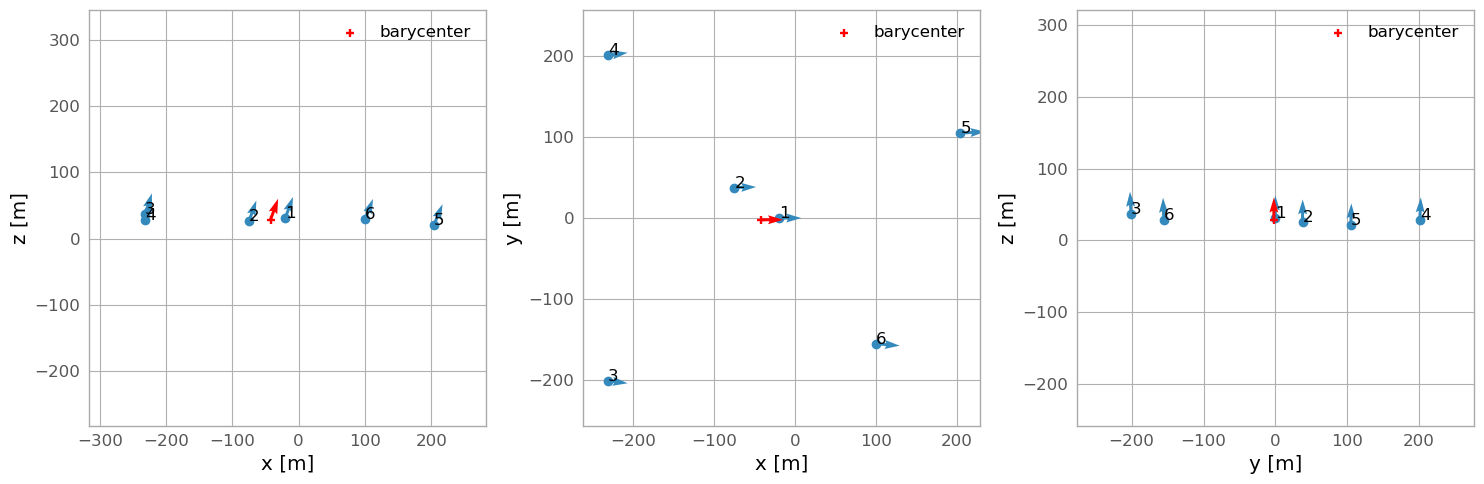

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
ax = array.display('xz', ax=axes[0])
array.display('xy', ax=axes[1])
array.display('yz', ax=axes[2])
fig.tight_layout()
plt.show()


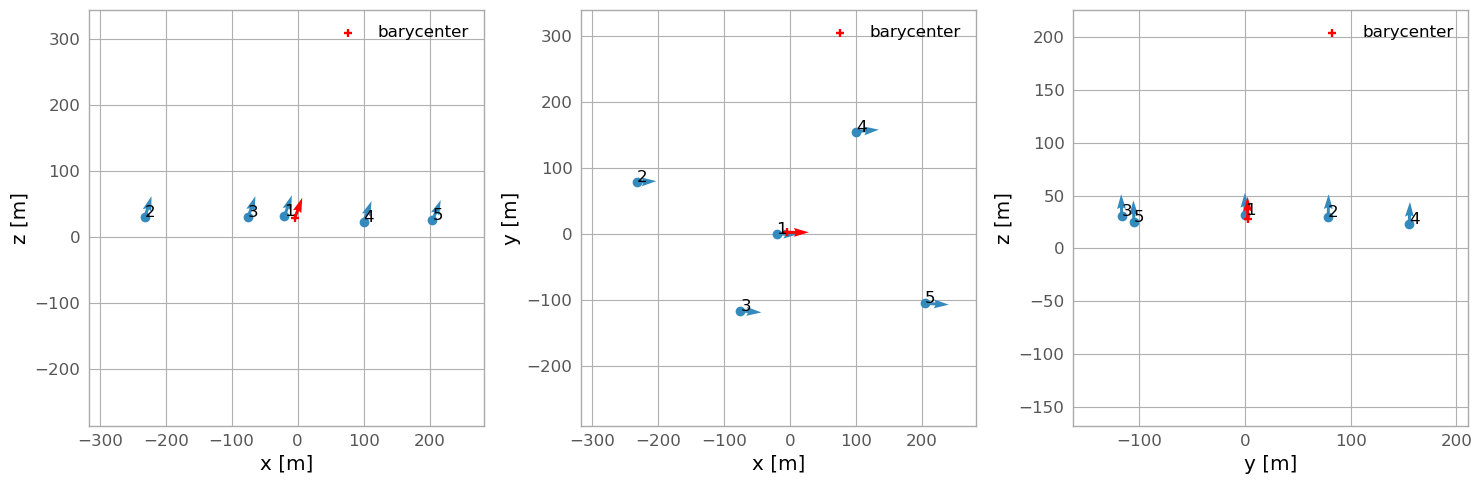

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
ax = array_2.display('xz', ax=axes[0])
array_2.display('xy', ax=axes[1])
array_2.display('yz', ax=axes[2])
fig.tight_layout()
plt.show()


fig, axes = plt.subplots(1, 3, figsize=(15,5))
ax = array_3.display('xz', ax=axes[0])
array_3.display('xy', ax=axes[1])
array_3.display('yz', ax=axes[2])
fig.tight_layout()
plt.show()


array_3.table

ax = array_3.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_3.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
c = []
label = []
for i in range(len(array_3.table)):
    # Append the color and label for each telescope based on FoV
    c.append(colors[i])
    label.append(fov_labels[colors[i]])
#print(c)
#print(label)
#array_3.display("xyz",color=c,label=label)

for i in range(len(array_3.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_3.table['x'][i], array_3.table['y'][i], array_3.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Array of only MST")
plt.show()
##SST IN GREEN 
#VIOLET ARE THE MST 
#LIGHT GREEN IS THE LST 

['lightseagreen', 'blueviolet', 'blueviolet', 'blueviolet', 'blueviolet']
['LST', 'MST', 'MST', 'MST', 'MST']


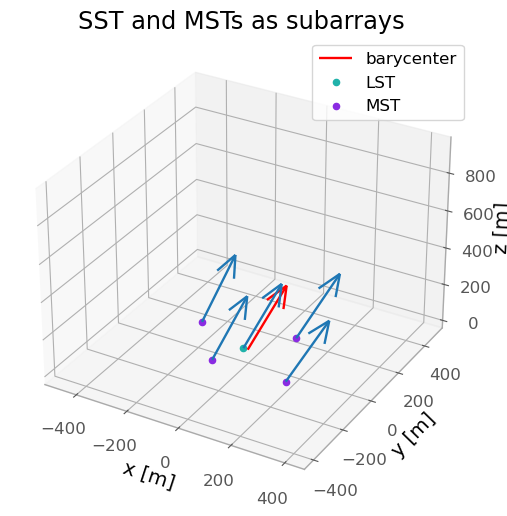

In [47]:
ax = array_2.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_2.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
c = []
label = []
for i in range(len(array_2.table)):
    # Append the color and label for each telescope based on FoV
    c.append(colors[i])
    label.append(fov_labels[colors[i]])
print(c)
print(label)
#array_3.display("xyz",color=c,label=label)

for i in range(len(array_2.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_2.table['x'][i], array_2.table['y'][i], array_2.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.title("SST and MSTs as subarrays")
plt.legend(by_label.values(), by_label.keys())
plt.show()
##SST IN GREEN 
#VIOLET ARE THE MST 
#LIGHT GREEN IS THE LST 

['lightseagreen', 'blueviolet', 'blueviolet', 'blueviolet', 'blueviolet', 'blueviolet']
['LST', 'MST', 'MST', 'MST', 'MST', 'MST']


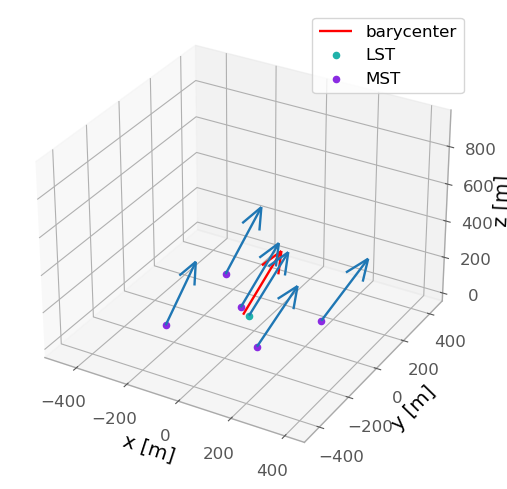

In [48]:
ax = array.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
c = []
label = []
for i in range(len(array.table)):
    # Append the color and label for each telescope based on FoV
    c.append(colors[i])
    label.append(fov_labels[colors[i]])
print(c)
print(label)
#array_3.display("xyz",color=c,label=label)

for i in range(len(array.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array.table['x'][i], array.table['y'][i], array.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()
##SST IN GREEN 
#VIOLET ARE THE MST 
#LIGHT GREEN IS THE LST 

## Divergence on zenith 40 altitude 50

In [49]:
div=0.02
alt=50
az=0

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.20it/s]


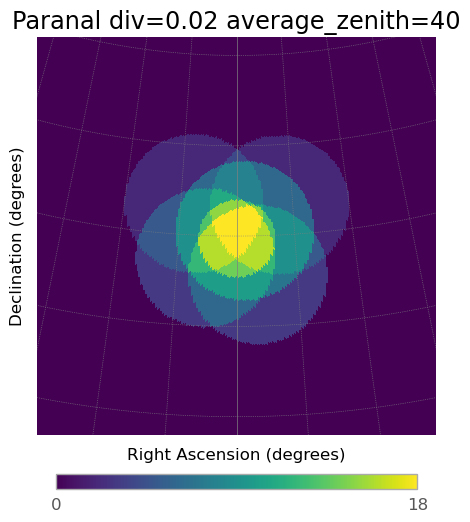

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.15it/s]


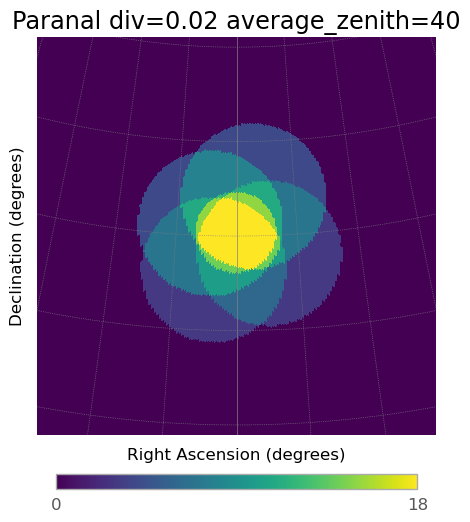

In [50]:
array.divergent_pointing(div, az=az,alt=alt)
array_2.divergent_pointing(div, az=az, alt=alt)
#array_3.divergent_pointing(div, az=az, alt=alt)
multiplicity_plot_with_subarray(array,number_of_telescopes_subarray_1 )


multiplicity_plot_with_subarray(array_2, number_of_telescopes_subarray_2 )


#array_3.multiplicity_plot()

In [51]:
print(array.hFoV())
hFoV_multiplicity(array, number_of_telescopes_subarray_1, m_cut=3)
#array_3.hFoV()

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.43it/s]


(114.3144172704022, 2.1631295170356775)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.49it/s]


(59.65541862602496, 9.704990107715982)

In [52]:
print(array_2.hFoV())
hFoV_multiplicity(array_2, number_of_telescopes_subarray_2, m_cut=3)

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.63it/s]


(96.75482053699982, 2.0744104093250204)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.57it/s]


(73.42507999277066, 8.714056081443115)

ax = array_3.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_3.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
c = []
label = []
for i in range(len(array_3.table)):
    # Append the color and label for each telescope based on FoV
    c.append(colors[i])
    label.append(fov_labels[colors[i]])
#print(c)
#print(label)
#array_3.display("xyz",color=c,label=label)

for i in range(len(array_3.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_3.table['x'][i], array_3.table['y'][i], array_3.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Array of only MST")
plt.show()
##SST IN GREEN 
#VIOLET ARE THE MST 
#LIGHT GREEN IS THE LST 

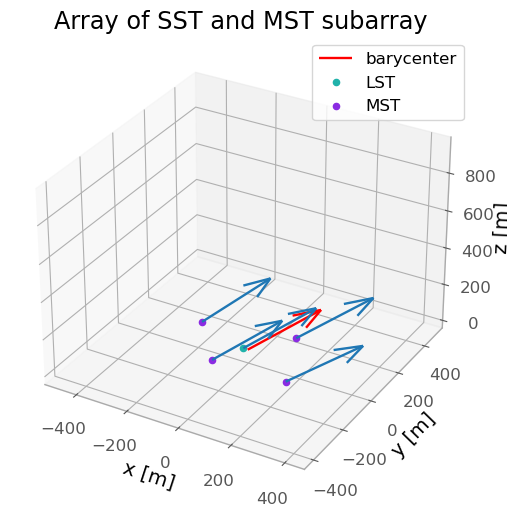

In [53]:
ax = array_2.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_2.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
c = []
label = []
for i in range(len(array_2.table)):
    # Append the color and label for each telescope based on FoV
    c.append(colors[i])
    label.append(fov_labels[colors[i]])
#print(c)
#print(label)
#array_3.display("xyz",color=c,label=label)

for i in range(len(array_2.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_2.table['x'][i], array_2.table['y'][i], array_2.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Array of SST and MST subarray")
plt.show()
##SST IN GREEN 
#VIOLET ARE THE MST 
#LIGHT GREEN IS THE LST 

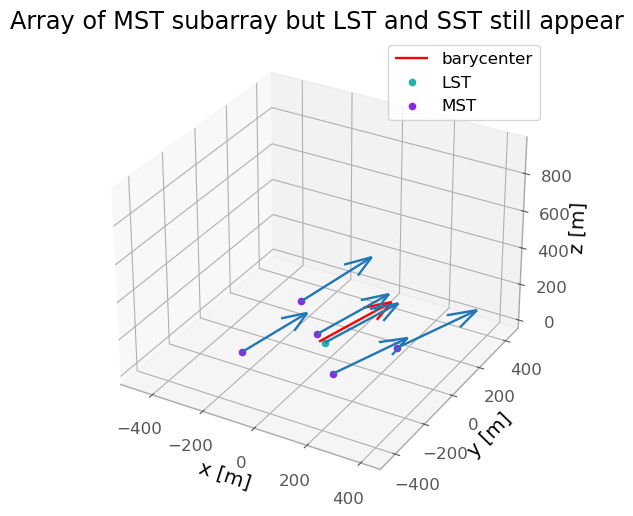

In [54]:
ax = array.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
c = []
label = []
for i in range(len(array.table)):
    # Append the color and label for each telescope based on FoV
    c.append(colors[i])
    label.append(fov_labels[colors[i]])
#print(c)
#print(label)
#array_3.display("xyz",color=c,label=label)

for i in range(len(array.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array.table['x'][i], array.table['y'][i], array.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Array of MST subarray but LST and SST still appear")
plt.show()
##SST IN GREEN 
#VIOLET ARE THE MST 
#LIGHT GREEN IS THE LST 

## Divergence on zenith 60 altitude 30

In [55]:
div=0.02
alt=30
az=0

In [56]:
array.divergent_pointing(div, az=az,alt=alt)
array_2.divergent_pointing(div, az=az,alt=alt)
#array_3.divergent_pointing(div, az=az, alt=alt)

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.09it/s]


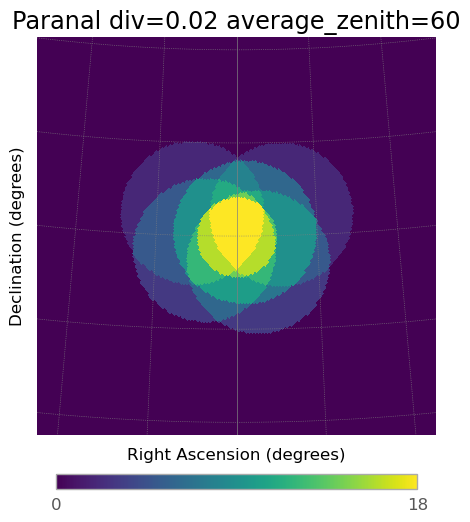

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.87it/s]


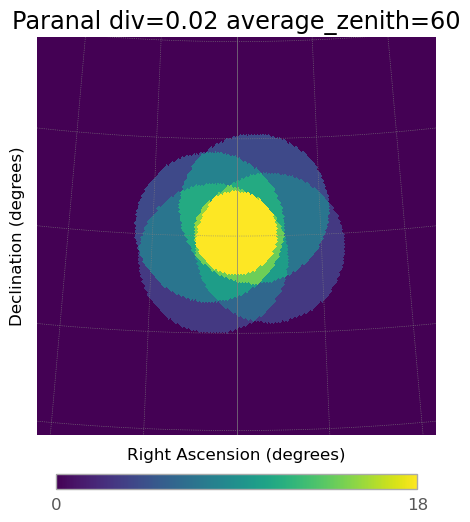

In [57]:
#array.multiplicity_plot()
#array_2.multiplicity_plot()
#array_3.multiplicity_plot()
multiplicity_plot_with_subarray(array,number_of_telescopes_subarray_1 )

#plt.savefig("multiplicity_plot_array_1.png", dpi=300, bbox_inches="tight")

multiplicity_plot_with_subarray(array_2, number_of_telescopes_subarray_2 )


In [58]:
print(array.hFoV())
hFoV_multiplicity(array, number_of_telescopes_subarray_1, m_cut=3)

#array_3.hFoV()

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.35it/s]


(102.02663374598247, 2.4240359897172237)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.13it/s]


(61.18975232117663, 10.037505357908273)

In [59]:
array_2.hFoV()
hFoV_multiplicity(array_2, number_of_telescopes_subarray_2, m_cut=3)

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.34it/s]


(68.91387664976065, 9.539676498572788)

ax = array_3.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_3.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
c = []
label = []
for i in range(len(array_3.table)):
    # Append the color and label for each telescope based on FoV
    c.append(colors[i])
    label.append(fov_labels[colors[i]])
#print(c)
#print(label)
#array_3.display("xyz",color=c,label=label)

for i in range(len(array_3.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_3.table['x'][i], array_3.table['y'][i], array_3.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Array of only MST")
plt.show()
##SST IN GREEN 
#VIOLET ARE THE MST 
#LIGHT GREEN IS THE LST 

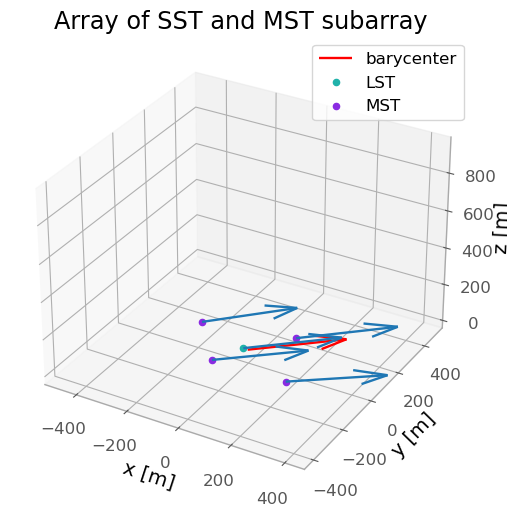

In [60]:
ax = array_2.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_2.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
c = []
label = []
for i in range(len(array_2.table)):
    # Append the color and label for each telescope based on FoV
    c.append(colors[i])
    label.append(fov_labels[colors[i]])
#print(c)
#print(label)
#array_3.display("xyz",color=c,label=label)

for i in range(len(array_2.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_2.table['x'][i], array_2.table['y'][i], array_2.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Array of SST and MST subarray")
plt.show()
##SST IN GREEN 
#VIOLET ARE THE MST 
#LIGHT GREEN IS THE LST 

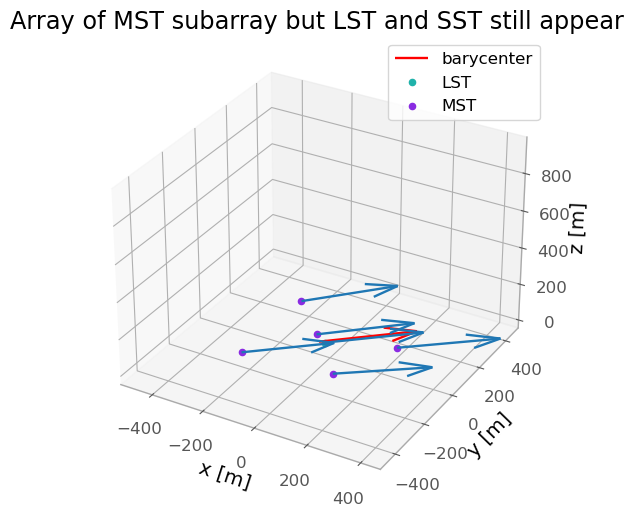

In [61]:
ax = array.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
c = []
label = []
for i in range(len(array.table)):
    # Append the color and label for each telescope based on FoV
    c.append(colors[i])
    label.append(fov_labels[colors[i]])
#print(c)
#print(label)
#array_3.display("xyz",color=c,label=label)

for i in range(len(array.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array.table['x'][i], array.table['y'][i], array.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Array of MST subarray but LST and SST still appear")
plt.show()
##SST IN GREEN 
#VIOLET ARE THE MST 
#LIGHT GREEN IS THE LST 

# HERE THERE IS AS WELL THE HFOV AND A MORE DETAILED AND FULL STUDY

## PLOTTING THEM TOGETHER AND DIFFERENT DIVERGENCE

In [62]:
#If you do not do this like this but just put array_alt_1=array and array_alt_2=array you will end up with a problem
#You will end up having them over write each pther because they come from the same point
array_alt_1= LoadConfig("./subarray_1_SOUTH.txt", frame=cta, pointing2src=True)
array_alt_1_div_2= LoadConfig("./subarray_1_SOUTH.txt", frame=cta, pointing2src=True)
array_alt_1_div_3= LoadConfig("./subarray_1_SOUTH.txt", frame=cta, pointing2src=True)
array_alt_2= LoadConfig("./subarray_1_SOUTH.txt", frame=cta, pointing2src=True)
array_alt_2_div_2= LoadConfig("./subarray_1_SOUTH.txt", frame=cta, pointing2src=True)
array_alt_2_div_3= LoadConfig("./subarray_1_SOUTH.txt", frame=cta, pointing2src=True)

array_alt_3= LoadConfig("./subarray_1_SOUTH.txt", frame=cta, pointing2src=True)
array_alt_3_div_2= LoadConfig("./subarray_1_SOUTH.txt", frame=cta, pointing2src=True)
array_alt_3_div_3= LoadConfig("./subarray_1_SOUTH.txt", frame=cta, pointing2src=True)

array_2_alt_1= LoadConfig("./subarray_2_SOUTH.txt", frame=cta, pointing2src=True)
array_2_alt_1_div_2= LoadConfig("./subarray_2_SOUTH.txt", frame=cta, pointing2src=True)
array_2_alt_1_div_3= LoadConfig("./subarray_2_SOUTH.txt", frame=cta, pointing2src=True)

array_2_alt_2= LoadConfig("./subarray_2_SOUTH.txt", frame=cta, pointing2src=True)
array_2_alt_2_div_2= LoadConfig("./subarray_2_SOUTH.txt", frame=cta, pointing2src=True)
array_2_alt_2_div_3= LoadConfig("./subarray_2_SOUTH.txt", frame=cta, pointing2src=True)
array_2_alt_3= LoadConfig("./subarray_2_SOUTH.txt", frame=cta, pointing2src=True)
array_2_alt_3_div_2= LoadConfig("./subarray_2_SOUTH.txt", frame=cta, pointing2src=True)
array_2_alt_3_div_3= LoadConfig("./subarray_2_SOUTH.txt", frame=cta, pointing2src=True)
#array_3_alt_1= LoadConfig("./subarray_telescope_only_MST.txt", frame=cta, poinitng2src=True)
#array_3_alt_2= LoadConfig("./subarray_telescope_only_MST.txt", frame=cta, poinitng2src=True)
#array_3_alt_3= LoadConfig("./subarray_telescope_only_MST.txt", frame=cta, poinitng2src=True)

In [63]:
div=0.05
div_2 = 0.1
div_3 = 0.35
alt_1=70
alt_2=50
alt_3=30
az=0

In [64]:
#Do this so you have them already in degrees and calculating the FoV and the average multiplicity
print(array_alt_1.hFoV())
print(hFoV_multiplicity(array_alt_1, number_of_telescopes_subarray_1, m_cut=3))
array_alt_1_div_2.hFoV()
array_alt_1_div_3.hFoV()

array_alt_2.hFoV()
array_alt_2_div_2.hFoV()
array_alt_2_div_3.hFoV()

array_alt_3.hFoV()
array_alt_3_div_2.hFoV()
array_alt_3_div_3.hFoV()

array_2_alt_1.hFoV()
array_2_alt_1_div_2.hFoV()
array_2_alt_1_div_3.hFoV()


array_2_alt_2.hFoV()
array_2_alt_2_div_2.hFoV()
array_2_alt_2_div_3.hFoV()
array_2_alt_3.hFoV()
array_2_alt_3_div_2.hFoV()
array_2_alt_3_div_3.hFoV()
#array_3_alt_1.hFoV()
#array_3_alt_2.hFoV()
#array_3_alt_3.hFoV()

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.49it/s]


(46.580797309219754, 5.313063063063063)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.62it/s]


(46.580797309219754, 15.252252252252251)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.10it/s]


(46.580797309219754, 4.313063063063063)

In [65]:
array_alt_3.table

<Table length=6>
  id     x       y       z       az   ...   p_x     p_y     p_z    d_tel 
         m       m       m      deg   ...                            m   
int64 float64 float64 float64 float64 ... float64 float64 float64 float64
----- ------- ------- ------- ------- ... ------- ------- ------- -------
    1   -20.0     0.0   31.75   0.000 ...   1.000  -0.000   0.000   22.55
    2   -75.0   37.75   26.25   0.000 ...   1.000  -0.000   0.000   51.63
    3  -231.5  -201.0   36.75   0.000 ...   1.000  -0.000   0.000  274.64
    4  -231.5   201.0   28.75   0.000 ...   1.000  -0.000   0.000  277.58
    5  204.33   105.0   21.33   0.000 ...   1.000  -0.000   0.000  268.97
    6   100.0 -155.33    29.0   0.000 ...   1.000  -0.000   0.000  209.10

In [66]:
#array_3.table

In [67]:
#ARRAY 1 ALT 1
array_alt_1.divergent_pointing(div, az=az,alt=alt_1)
array_alt_1_div_2.divergent_pointing(div_2, az=az,alt=alt_1)
array_alt_1_div_3.divergent_pointing(div_3, az=az,alt=alt_1)
#ARRAY 2 ALT 1
array_2_alt_1.divergent_pointing(div, az=az,alt=alt_1)
array_2_alt_1_div_2.divergent_pointing(div_2, az=az,alt=alt_1)
array_2_alt_1_div_3.divergent_pointing(div_3, az=az,alt=alt_1)
# ARRAY 1 ALT 2
array_alt_2.divergent_pointing(div, az=az,alt=alt_2)
array_alt_2_div_2.divergent_pointing(div_2, az=az,alt=alt_2)
array_alt_2_div_3.divergent_pointing(div_3, az=az,alt=alt_2)
# ARRAY 2 ALT 2
array_2_alt_2.divergent_pointing(div, az=az,alt=alt_2)
array_2_alt_2_div_2.divergent_pointing(div_2, az=az,alt=alt_2)
array_2_alt_2_div_3.divergent_pointing(div_3, az=az,alt=alt_2)
# ARRAY 1 ALT 3
array_alt_3.divergent_pointing(div, az=az,alt=alt_3)
array_alt_3_div_2.divergent_pointing(div_2, az=az,alt=alt_3)
array_alt_3_div_3.divergent_pointing(div_3, az=az,alt=alt_3)
# ARRAY 2 ALT 3
array_2_alt_3.divergent_pointing(div, az=az,alt=alt_3)
array_2_alt_3_div_2.divergent_pointing(div_2, az=az,alt=alt_3)
array_2_alt_3_div_3.divergent_pointing(div_3, az=az,alt=alt_3)

#array_3_alt_3.divergent_pointing(div, az=az, alt=alt_3)

# THE FIELD OF VIEW

In [68]:
print("array_alt_1 hFoV:", array_alt_1.hFoV())
print(f"The FoV and the average multiplicity is for array_1 with divergence{div:.2f} and altitude{alt_1:.2f} :",hFoV_multiplicity(array_alt_1, number_of_telescopes_subarray_1, m_cut=0))
print("array_alt_1_div_2 hFoV:", array_alt_1_div_2.hFoV())
print(f"The FoV and the average multiplicity is for array_1 with divergence{div_2:.2f} and altitude{alt_1:.2f} :",hFoV_multiplicity(array_alt_1_div_2, number_of_telescopes_subarray_1, m_cut=3))
print("array_alt_1_div_3 hFoV:", array_alt_1_div_3.hFoV())
print(f"The FoV and the average multiplicity is for array_1 with divergence{div_3:.2f} and altitude{alt_1:.2f} :",hFoV_multiplicity(array_alt_1_div_3, number_of_telescopes_subarray_1, m_cut=3))

print("array_alt_2 hFoV:", array_alt_2.hFoV())
print(f"The FoV and the average multiplicity is for array_1 with divergence{div:.2f} and altitude{alt_2:.2f} :",hFoV_multiplicity(array_alt_2, number_of_telescopes_subarray_1, m_cut=3))
print("array_alt_2_div_2 hFoV:", array_alt_2_div_2.hFoV())
print(f"The FoV and the average multiplicity is for array_1 with divergence{div_2:.2f} and altitude{alt_2:.2f} :",hFoV_multiplicity( array_alt_2_div_2, number_of_telescopes_subarray_1, m_cut=3))
print("array_alt_2_div_3 hFoV:", array_alt_2_div_3.hFoV())
print(f"The FoV and the average multiplicity is for array_1 with divergence{div_3:.2f} and altitude{alt_2:.2f} :",hFoV_multiplicity( array_alt_2_div_3, number_of_telescopes_subarray_1, m_cut=3))

print("array_alt_3 hFoV:", array_alt_3.hFoV())
print(f"The FoV and the average multiplicity is for array_1 with divergence{div:.2f} and altitude{alt_3:.2f} :",hFoV_multiplicity(array_alt_3, number_of_telescopes_subarray_1, m_cut=3))
print("array_alt_3_div_2 hFoV:", array_alt_3_div_2.hFoV())
print(f"The FoV and the average multiplicity is for array_1 with divergence{div_2:.2f} and altitude{alt_3:.2f} :",hFoV_multiplicity(array_alt_3_div_2, number_of_telescopes_subarray_1, m_cut=3))
print("array_alt_3_div_3 hFoV:", array_alt_3_div_3.hFoV())
print(f"The FoV and the average multiplicity is for array_1 with divergence{div_3:.2f} and altitude{alt_3:.2f} :",hFoV_multiplicity(array_alt_3_div_3, number_of_telescopes_subarray_1, m_cut=3))

print("array_2_alt_1 hFoV:", array_2_alt_1.hFoV())
print(f"The FoV and the average multiplicity is for array_2 with divergence{div:.2f} and altitude{alt_1:.2f} :",hFoV_multiplicity(array_2_alt_1, number_of_telescopes_subarray_2, m_cut=3))
print("array_2_alt_1_div_2 hFoV:", array_2_alt_1_div_2.hFoV())
print(f"The FoV and the average multiplicity is for array_2 with divergence{div_2:.2f} and altitude{alt_1:.2f} :",hFoV_multiplicity(array_2_alt_1_div_2, number_of_telescopes_subarray_2, m_cut=3))
print("array_2_alt_1_div_3 hFoV:", array_2_alt_1_div_3.hFoV())
print(f"The FoV and the average multiplicity is for array_2 with divergence{div_3:.2f} and altitude{alt_1:.2f} :",hFoV_multiplicity(array_2_alt_1_div_3, number_of_telescopes_subarray_2, m_cut=3))

print("array_2_alt_2 hFoV:", array_2_alt_2.hFoV())
print(f"The FoV and the average multiplicity is for array_2 with divergence{div:.2f} and altitude{alt_2:.2f} :",hFoV_multiplicity(array_2_alt_2, number_of_telescopes_subarray_2, m_cut=3))
print("array_2_alt_2_div_2 hFoV:", array_2_alt_2_div_2.hFoV())
print(f"The FoV and the average multiplicity is for array_2 with divergence{div_2:.2f} and altitude{alt_2:.2f} :",hFoV_multiplicity(array_2_alt_2_div_2, number_of_telescopes_subarray_2, m_cut=3))
print("array_2_alt_2_div_3 hFoV:", array_2_alt_2_div_3.hFoV())
print(f"The FoV and the average multiplicity is for array_2 with divergence{div_3:.2f} and altitude{alt_2:.2f} :",hFoV_multiplicity(array_2_alt_2_div_3, number_of_telescopes_subarray_2, m_cut=3))

print("array_2_alt_3 hFoV:", array_2_alt_3.hFoV())
print(f"The FoV and the average multiplicity is for array_2 with divergence{div:.2f} and altitude{alt_3:.2f} :",hFoV_multiplicity(array_2_alt_3, number_of_telescopes_subarray_2, m_cut=3))

print(f"The FoV and the average multiplicity is for array_2 with divergence{div_2:.2f} and altitude{alt_3:.2f} :",hFoV_multiplicity(array_2_alt_3_div_2, number_of_telescopes_subarray_2, m_cut=3))

print(f"The FoV and the average multiplicity is for array_2 with divergence{div_3:.2f} and altitude{alt_3:.2f} :",hFoV_multiplicity(array_2_alt_3_div_3, number_of_telescopes_subarray_2, m_cut=3))


100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.92it/s]


array_alt_1 hFoV: (228.07804808613457, 1.0839466421343147)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.06it/s]


The FoV and the average multiplicity is for array_1 with divergence0.05 and altitude70.00 : (228.07804808613457, 3.112120515179393)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.06it/s]


array_alt_1_div_2 hFoV: (239.84127308229733, 1.0306741757340478)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.49it/s]


The FoV and the average multiplicity is for array_1 with divergence0.10 and altitude70.00 : (53.70167933030825, 4.547985347985348)


100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.86it/s]


array_alt_1_div_3 hFoV: (247.25066229392718, 1.0)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.07it/s]


The FoV and the average multiplicity is for array_1 with divergence0.35 and altitude70.00 : (61.08484061552523, 4.0)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.21it/s]


array_alt_2 hFoV: (218.99007158408241, 1.1287502245643453)


100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.87it/s]


The FoV and the average multiplicity is for array_1 with divergence0.05 and altitude50.00 : (47.11846980068316, 5.995546896743668)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.27it/s]


array_alt_2_div_2 hFoV: (237.76926689568228, 1.0392697589763389)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.25it/s]


The FoV and the average multiplicity is for array_1 with divergence0.10 and altitude50.00 : (51.695242959725306, 4.722475900558092)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.19it/s]


array_alt_2_div_3 hFoV: (247.2244343675143, 1.0)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.31it/s]


The FoV and the average multiplicity is for array_1 with divergence0.35 and altitude50.00 : (61.07172665231881, 4.0)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.06it/s]


array_alt_3 hFoV: (193.54898296361893, 1.2784063960972967)


100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.73it/s]


The FoV and the average multiplicity is for array_1 with divergence0.05 and altitude30.00 : (55.76057155371689, 6.717544684854186)


100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.92it/s]


array_alt_3_div_2 hFoV: (235.29072784966803, 1.0504960428045926)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.06it/s]


The FoV and the average multiplicity is for array_1 with divergence0.10 and altitude30.00 : (49.40029939860102, 4.956464029731882)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.60it/s]


array_alt_3_div_3 hFoV: (247.2244343675143, 1.0)


100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.42it/s]


The FoV and the average multiplicity is for array_1 with divergence0.35 and altitude30.00 : (61.032384762699536, 4.0)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.51it/s]


array_2_alt_1 hFoV: (191.49009074021026, 1.0484865086974386)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.39it/s]


The FoV and the average multiplicity is for array_2 with divergence0.05 and altitude70.00 : (99.60055055279393, 4.3601053324555625)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.56it/s]


array_2_alt_1_div_2 hFoV: (200.7747766903588, 1.0)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.64it/s]


The FoV and the average multiplicity is for array_2 with divergence0.10 and altitude70.00 : (107.5082703662679, 4.0)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.17it/s]


array_2_alt_1_div_3 hFoV: (200.68297894791382, 1.0)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.58it/s]


The FoV and the average multiplicity is for array_2 with divergence0.35 and altitude70.00 : (107.70497981436426, 4.0)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.52it/s]


array_2_alt_2 hFoV: (182.84798898717654, 1.097181381338306)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.50it/s]


The FoV and the average multiplicity is for array_2 with divergence0.05 and altitude50.00 : (98.28915423215149, 4.635890593729153)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.39it/s]


array_2_alt_2_div_2 hFoV: (200.78789065356523, 1.0)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.06it/s]


The FoV and the average multiplicity is for array_2 with divergence0.10 and altitude50.00 : (107.71809377757069, 4.0)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.32it/s]


array_2_alt_2_div_3 hFoV: (200.7747766903588, 1.0)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.34it/s]


The FoV and the average multiplicity is for array_2 with divergence0.35 and altitude50.00 : (107.63940999833214, 4.0)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.26it/s]


array_2_alt_3 hFoV: (156.2528716045477, 1.2845992446496013)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.73it/s]


The FoV and the average multiplicity is for array_2 with divergence0.05 and altitude30.00 : (93.86974863158643, 5.567896060352053)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.51it/s]


The FoV and the average multiplicity is for array_2 with divergence0.10 and altitude30.00 : (107.70497981436426, 4.0)


100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.04it/s]

The FoV and the average multiplicity is for array_2 with divergence0.35 and altitude30.00 : (107.66563792474498, 4.0)


In [69]:
array_alt_3.table

<Table length=6>
  id     x       y       z       az   ...   p_x     p_y     p_z    d_tel 
         m       m       m      deg   ...                            m   
int64 float64 float64 float64 float64 ... float64 float64 float64 float64
----- ------- ------- ------- ------- ... ------- ------- ------- -------
    1   -20.0     0.0   31.75 359.931 ...   0.868   0.001   0.496   22.55
    2   -75.0   37.75   26.25 358.655 ...   0.862   0.020   0.506   51.63
    3  -231.5  -201.0   36.75   7.356 ...   0.832  -0.107   0.544  274.64
    4  -231.5   201.0   28.75 352.490 ...   0.834   0.110   0.541  277.58
    5  204.33   105.0   21.33 356.898 ...   0.893   0.048   0.448  268.97
    6   100.0 -155.33    29.0   4.679 ...   0.880  -0.072   0.469  209.10

In [70]:
array_alt_1.table


<Table length=6>
  id     x       y       z       az   ...   p_x     p_y     p_z    d_tel 
         m       m       m      deg   ...                            m   
int64 float64 float64 float64 float64 ... float64 float64 float64 float64
----- ------- ------- ------- ------- ... ------- ------- ------- -------
    1   -20.0     0.0   31.75 359.830 ...   0.351   0.001   0.936   22.55
    2   -75.0   37.75   26.25 356.495 ...   0.328   0.020   0.945   51.63
    3  -231.5  -201.0   36.75  21.933 ...   0.252  -0.102   0.962  274.64
    4  -231.5   201.0   28.75 337.650 ...   0.253   0.104   0.962  277.58
    5  204.33   105.0   21.33 353.429 ...   0.445   0.051   0.894  268.97
    6   100.0 -155.33    29.0  10.516 ...   0.401  -0.075   0.913  209.10

# SUB_ARRAY_1 DIV 1

100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.47it/s]


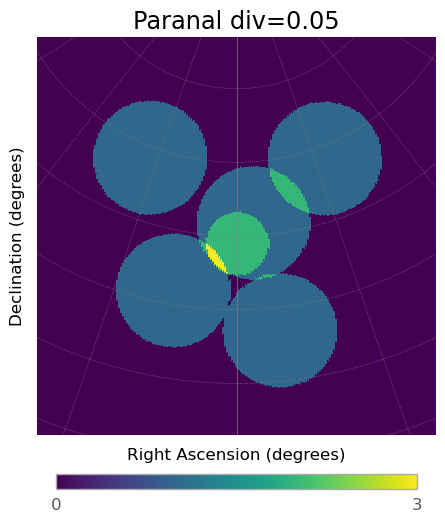

100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.44it/s]


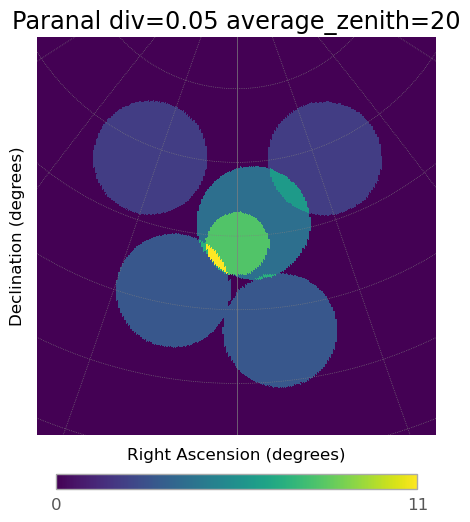

100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.90it/s]


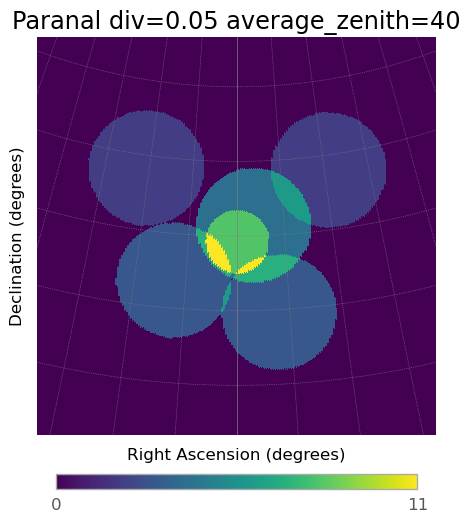

100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.81it/s]


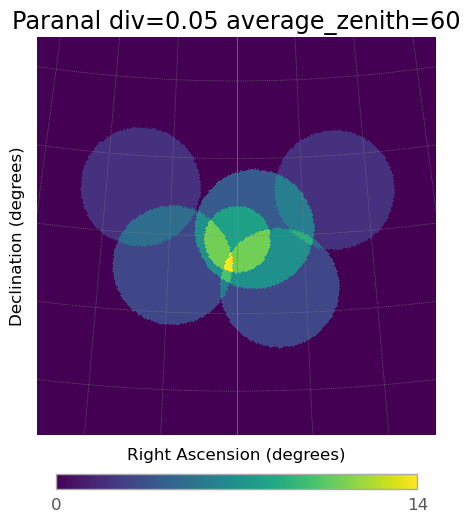

In [71]:

array_alt_1.multiplicity_plot()# Set the main title for the entire figure
multiplicity_plot_with_subarray(array_alt_1,number_of_telescopes_subarray_1)

multiplicity_plot_with_subarray(array_alt_2,number_of_telescopes_subarray_1 )

multiplicity_plot_with_subarray(array_alt_3,number_of_telescopes_subarray_1 )





# SUB_ARRAY_1 DIV 2

100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.68it/s]


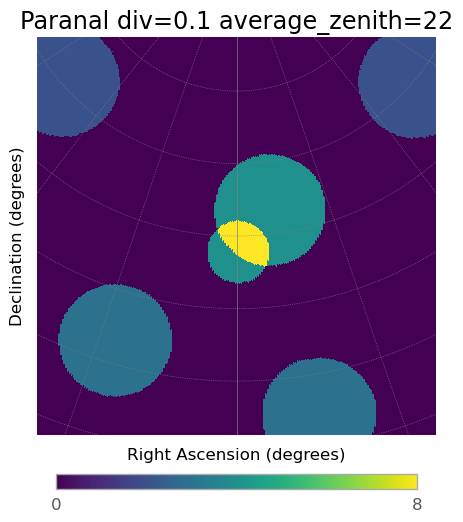

100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.44it/s]


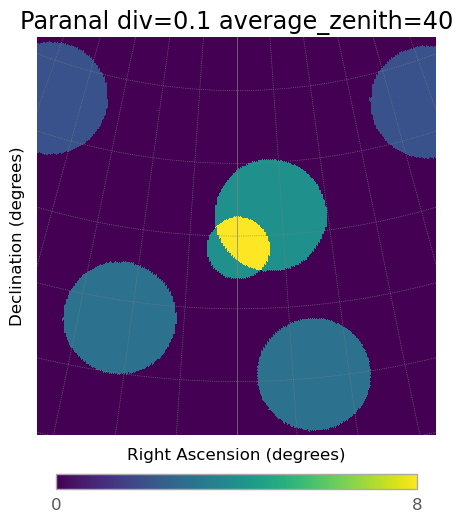

100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.27it/s]


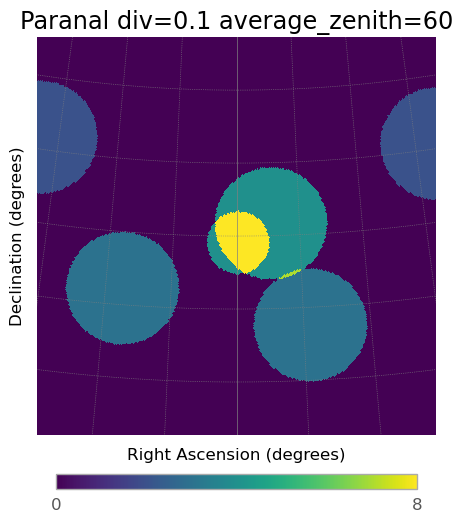

In [72]:
multiplicity_plot_with_subarray(array_alt_1_div_2,number_of_telescopes_subarray_1 )
multiplicity_plot_with_subarray(array_alt_2_div_2,number_of_telescopes_subarray_1 )
multiplicity_plot_with_subarray(array_alt_3_div_2,number_of_telescopes_subarray_1 )

# SUB_ARRAY_1 DIV 3

100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.60it/s]


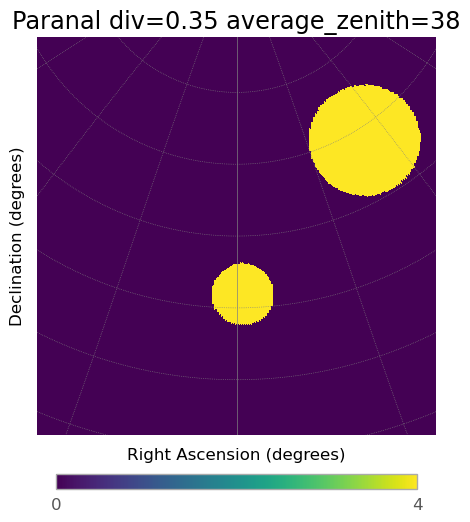

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.37it/s]


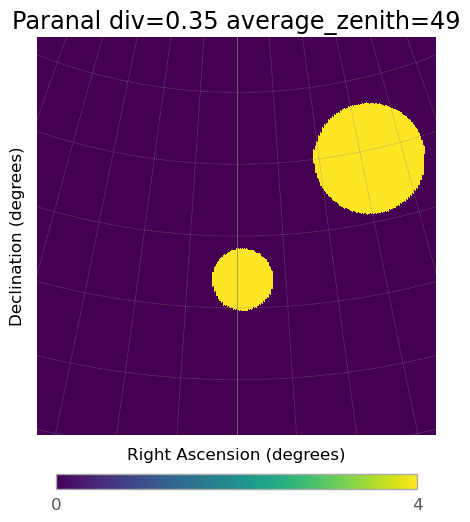

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.00it/s]


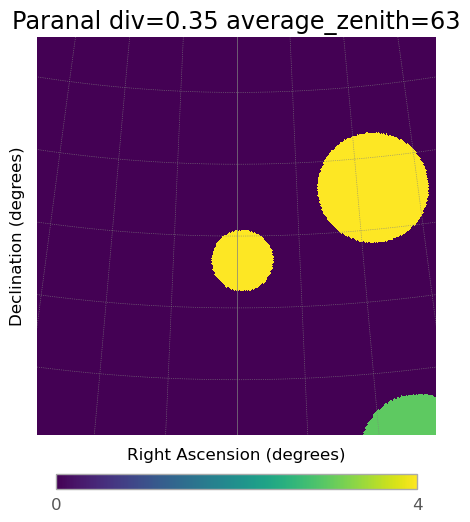

In [73]:
multiplicity_plot_with_subarray(array_alt_1_div_3,number_of_telescopes_subarray_1 )
multiplicity_plot_with_subarray(array_alt_2_div_3,number_of_telescopes_subarray_1 )
multiplicity_plot_with_subarray(array_alt_3_div_3,number_of_telescopes_subarray_1 )

# SUB_ARRAY_2 DIV_1

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.06it/s]


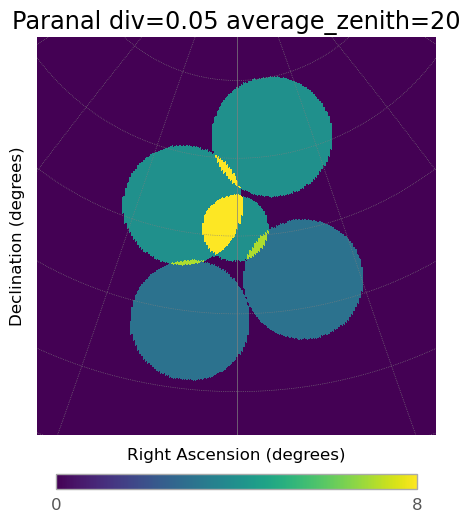

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.23it/s]


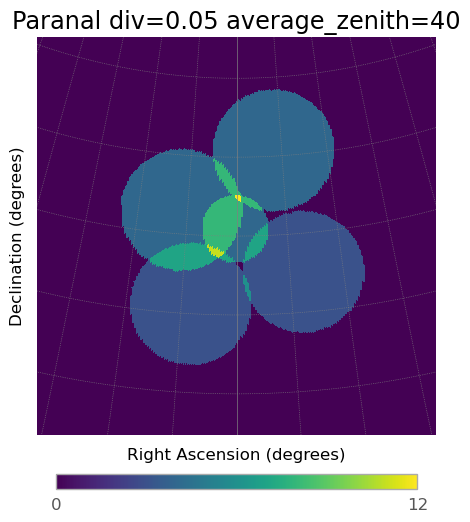

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.51it/s]


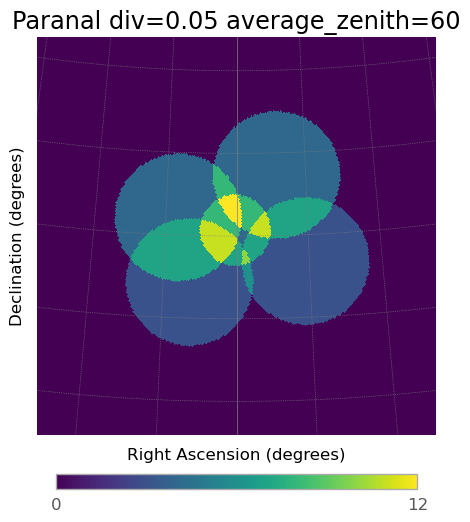

In [74]:
multiplicity_plot_with_subarray(array_2_alt_1,number_of_telescopes_subarray_2)
multiplicity_plot_with_subarray(array_2_alt_2,number_of_telescopes_subarray_2 )
multiplicity_plot_with_subarray(array_2_alt_3,number_of_telescopes_subarray_2 )

# SUB_ARRAY_2 DIV_2

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.65it/s]


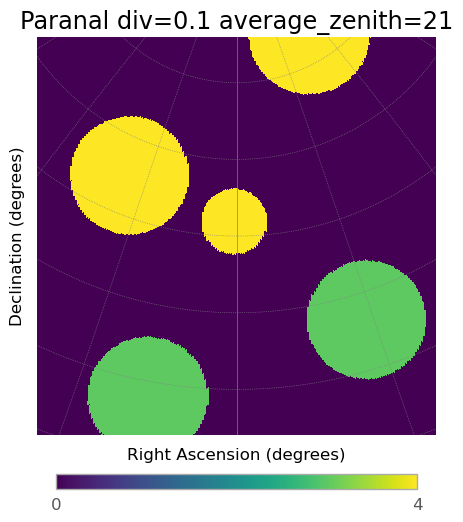

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.30it/s]


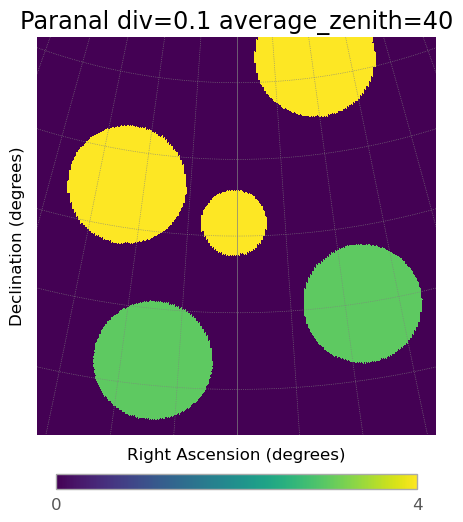

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.47it/s]


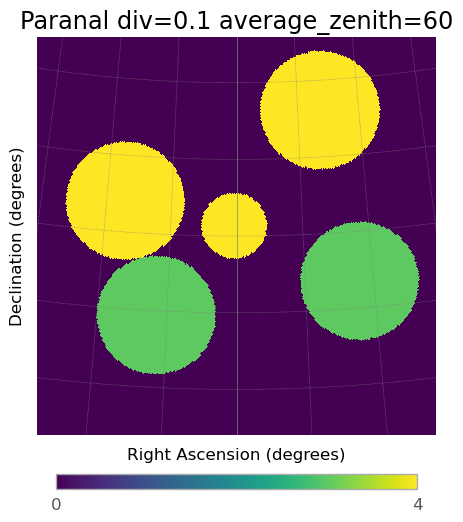

In [75]:
multiplicity_plot_with_subarray(array_2_alt_1_div_2,number_of_telescopes_subarray_2)
multiplicity_plot_with_subarray(array_2_alt_2_div_2,number_of_telescopes_subarray_2 )
multiplicity_plot_with_subarray(array_2_alt_3_div_2,number_of_telescopes_subarray_2 )

# SUB_ARRAY_2 DIV_3 

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.29it/s]


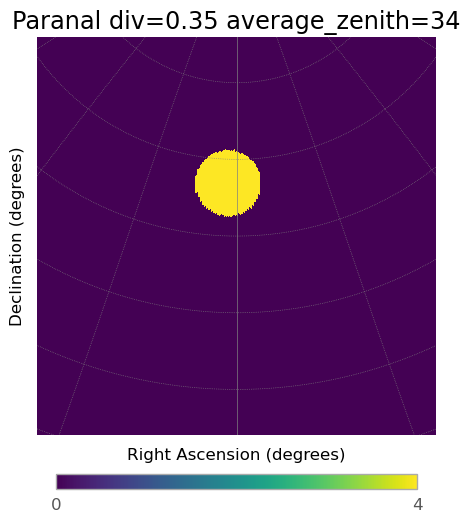

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.90it/s]


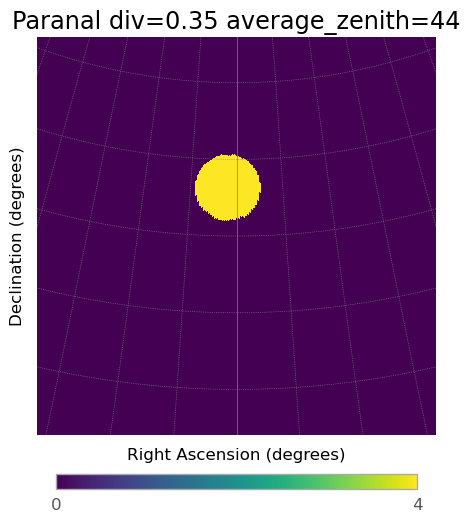

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  5.72it/s]


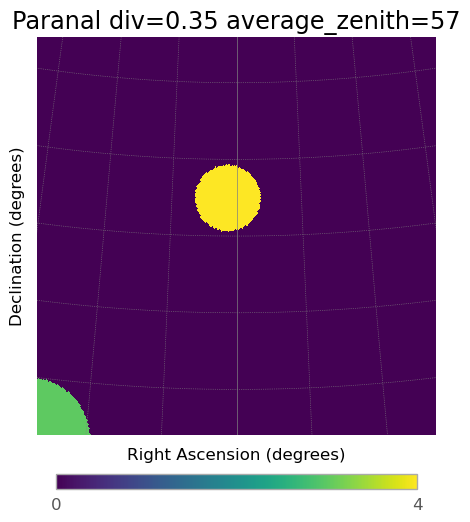

In [76]:
multiplicity_plot_with_subarray(array_2_alt_1_div_3,number_of_telescopes_subarray_2)
multiplicity_plot_with_subarray(array_2_alt_2_div_3,number_of_telescopes_subarray_2 )
multiplicity_plot_with_subarray(array_2_alt_3_div_3,number_of_telescopes_subarray_2 )

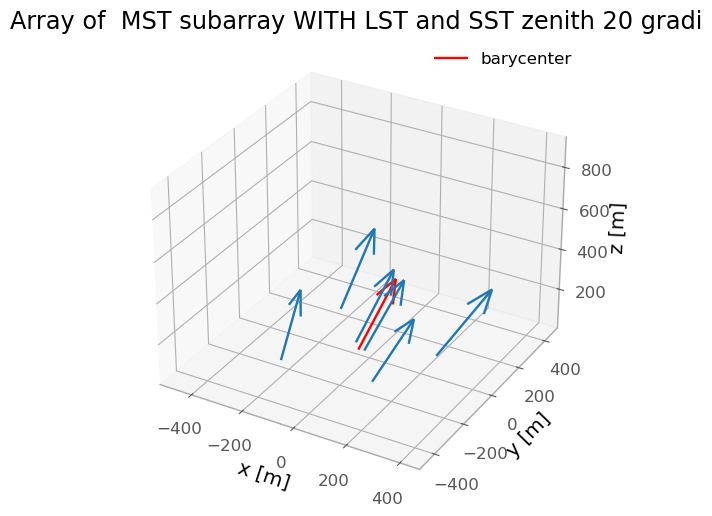

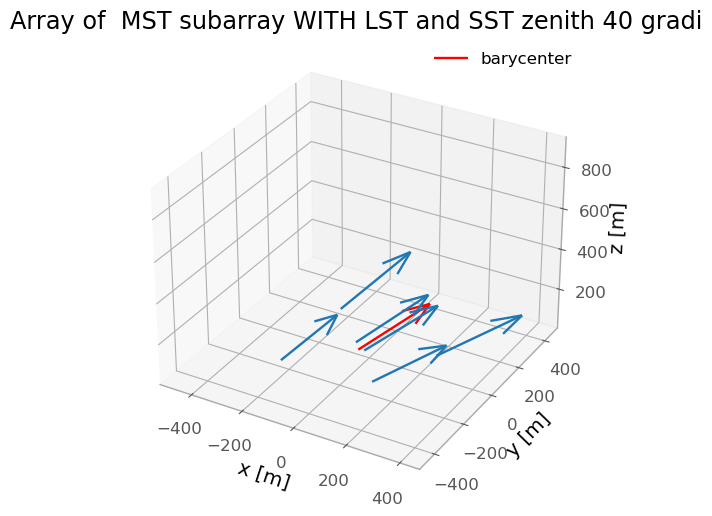

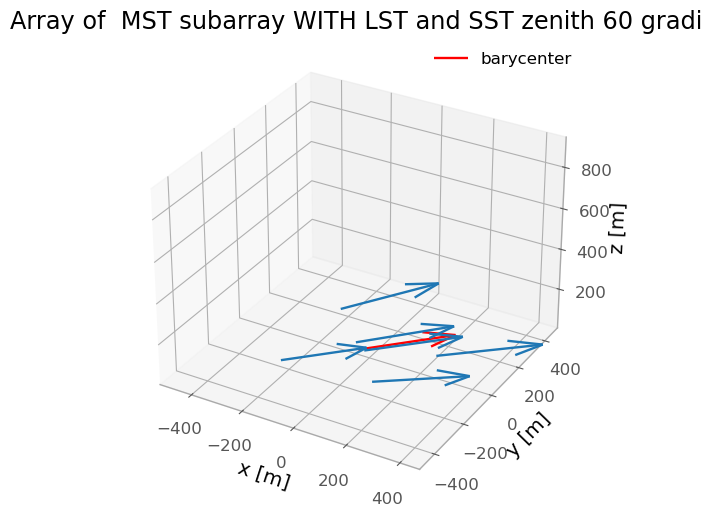

In [77]:
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_alt_1.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}

array_alt_1.display("xyz")
plt.title("Array of  MST subarray WITH LST and SST zenith 20 gradi")
array_alt_2.display("xyz")
plt.title("Array of  MST subarray WITH LST and SST zenith 40 gradi")
array_alt_3.display("xyz")
plt.title("Array of  MST subarray WITH LST and SST zenith 60 gradi")
for i in range(len(array_alt_1.table)):
    # Append the color and label for each telescope based on FoV
    c.append(colors[i])
    label.append(fov_labels[colors[i]])
#print(c)
#print(label)
#array_3.display("xyz",color=c,label=label)
#
#for i in range(len(array_alt_1.table)):
    # Color each telescope point according to the FoV
#    axes[0].scatter(array_alt_1.table['x'][i], array_alt_1.table['y'][i], array_alt_1.table['z'][i], 
#               color=colors[i], label=fov_labels[colors[i]])

#fig.tight_layout()
plt.show()


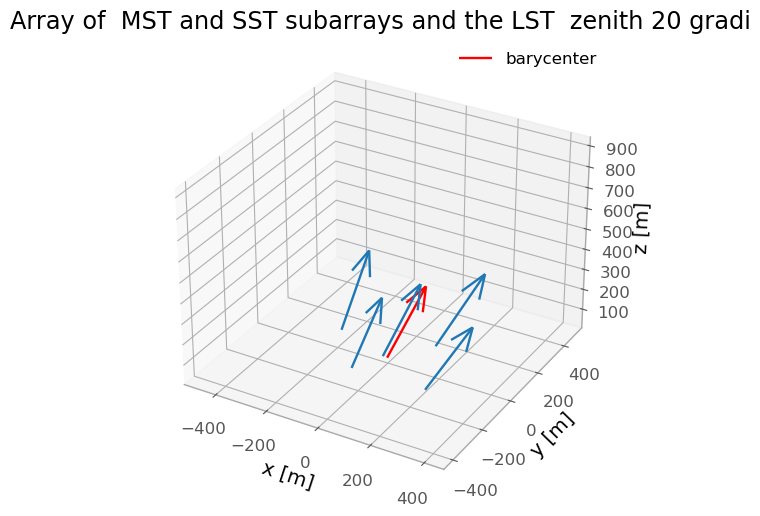

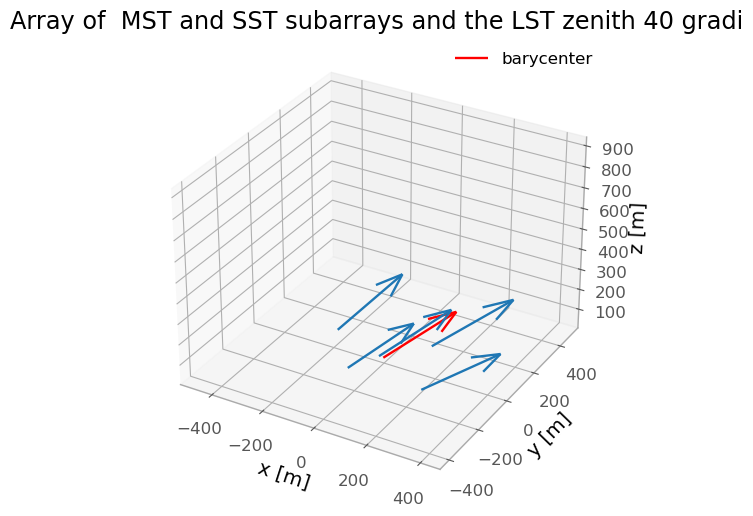

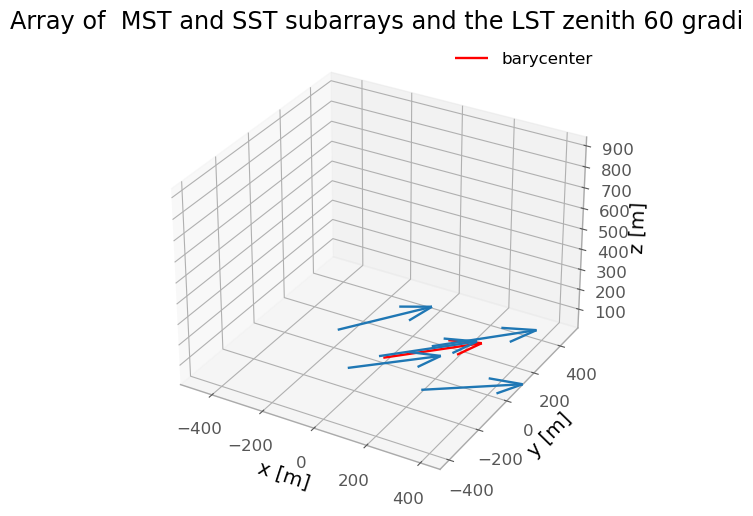

In [78]:
array_2_alt_1.display("xyz")
plt.title("Array of  MST and SST subarrays and the LST  zenith 20 gradi")
array_2_alt_2.display("xyz")
plt.title("Array of  MST and SST subarrays and the LST zenith 40 gradi")
array_2_alt_3.display("xyz")
plt.title("Array of  MST and SST subarrays and the LST zenith 60 gradi")
plt.show()

array_3_alt_1.display("xyz")
plt.title("Array of only MST subarray 20 gradi")
array_3_alt_2.display("xyz")
plt.title("Array of only MST subarray 40 gradi")
array_3_alt_3.display("xyz")
plt.title("Array of only MST subarray 60 gradi")
plt.show()

## WITH THE COLOR MARKS 

{'barycenter': <mpl_toolkits.mplot3d.art3d.Line3DCollection object at 0x127819910>}


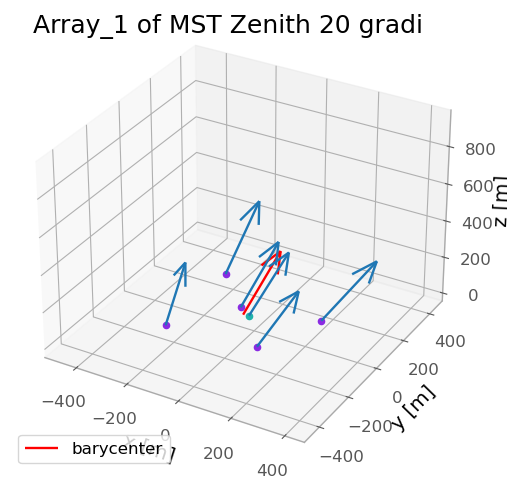

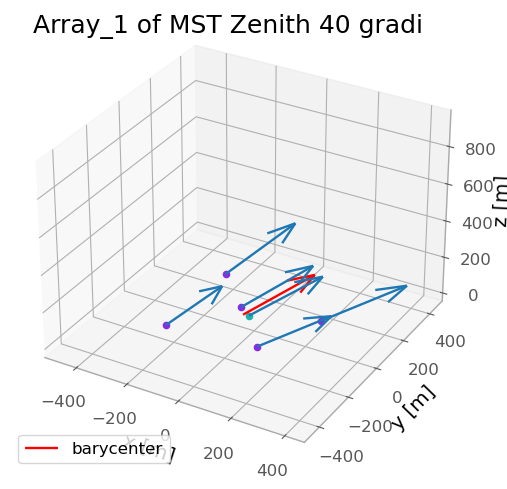

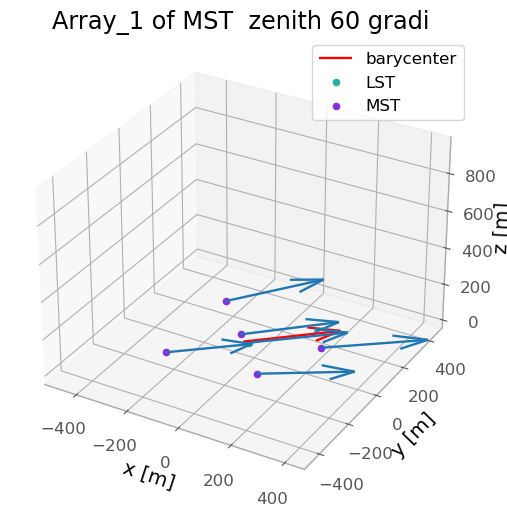

In [79]:
#array_alt_1.display("xyz")
#fig = plt.figure()
ax = array_alt_1.display("xyz")
ax_2 = array_alt_2.display("xyz")
ax_3 = array_alt_3.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_2 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels_2 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_3 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels_3 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}

#array_3.display("xyz",color=c,label=label)

for i in range(len(array_alt_1.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_alt_1.table['x'][i], array_alt_1.table['y'][i], array_alt_1.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='lower left')
ax.text2D(0.05, 0.95, "Array_1 of MST Zenith 20 gradi", 
          transform=ax.transAxes, fontsize=18)
plt.gcf().savefig("./array_ZENITH_20.png", dpi=300)

#SECOND ALTITUDE



for i in range(len(array_alt_2.table)):
    # Color each telescope point according to the FoV
    ax_2.scatter(array_alt_2.table['x'][i], array_alt_2.table['y'][i], array_alt_2.table['z'][i], 
               color=colors_2[i], label=fov_labels_2[colors_2[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
print(by_label)
ax_2.legend(by_label.values(), by_label.keys())
ax_2.text2D(0.05, 0.95, "Array_1 of MST Zenith 40 gradi", 
            transform=ax_2.transAxes, fontsize=18)
plt.gcf().savefig("./array_1_ZENITH_40.png", dpi=300)

#THIRD ALTITUDE


for i in range(len(array_alt_3.table)):
    # Color each telescope point according to the FoV
    ax_3.scatter(array_alt_3.table['x'][i], array_alt_3.table['y'][i], array_alt_3.table['z'][i], 
               color=colors_3[i], label=fov_labels_3[colors_3[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Array_1 of MST  zenith 60 gradi")
plt.gcf().savefig("./array_1_ZENITH_60.png", dpi=300)
plt.show()
##SST IN GREEN 
#VIOLET ARE THE MST 
#LIGHT GREEN IS THE LST 

{'barycenter': <mpl_toolkits.mplot3d.art3d.Line3DCollection object at 0x128515d60>}


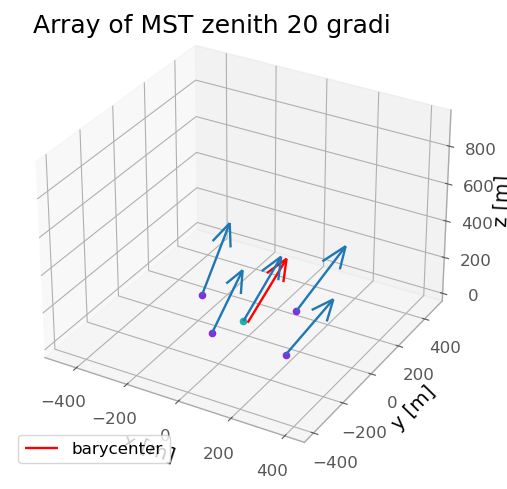

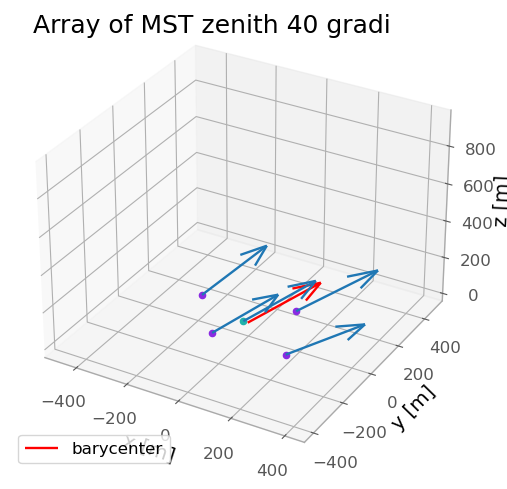

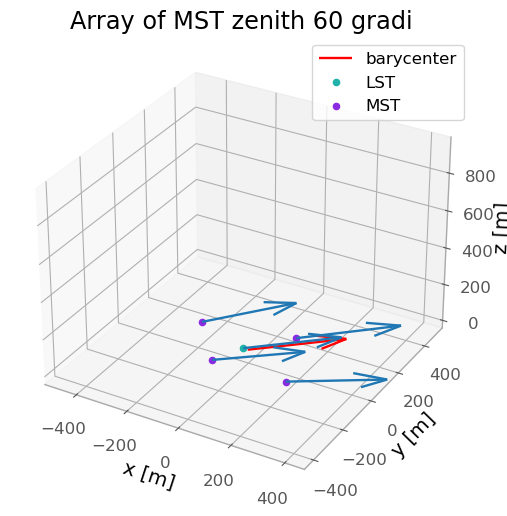

In [80]:
#array_alt_1.display("xyz")
#fig = plt.figure()
ax = array_2_alt_1.display("xyz")
ax_2 = array_2_alt_2.display("xyz")
ax_3 = array_2_alt_3.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_2_alt_1.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_2 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_2_alt_2.table["fov"]
]
fov_labels_2 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_3 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_2_alt_3.table["fov"]
]
fov_labels_3 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}

#array_3.display("xyz",color=c,label=label)

for i in range(len(array_2_alt_1.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_2_alt_1.table['x'][i], array_2_alt_1.table['y'][i], array_2_alt_1.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='lower left')
ax.text2D(0.05, 0.95, "Array of MST zenith 20 gradi", 
          transform=ax.transAxes, fontsize=18)

plt.savefig("array_1_ZENITH_20.png", dpi=300)
#SECOND ALTITUDE



for i in range(len(array_2_alt_2.table)):
    # Color each telescope point according to the FoV
    ax_2.scatter(array_2_alt_2.table['x'][i], array_2_alt_2.table['y'][i], array_2_alt_2.table['z'][i], 
               color=colors_2[i], label=fov_labels_2[colors_2[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
print(by_label)
ax_2.legend(by_label.values(), by_label.keys())
ax_2.text2D(0.05, 0.95, "Array of MST zenith 40 gradi", 
            transform=ax_2.transAxes, fontsize=18)

plt.savefig("array_1_ZENITH_40.png", dpi=300)
#THIRD ALTITUDE


for i in range(len(array_2_alt_3.table)):
    # Color each telescope point according to the FoV
    ax_3.scatter(array_2_alt_3.table['x'][i], array_2_alt_3.table['y'][i], array_2_alt_3.table['z'][i], 
               color=colors_3[i], label=fov_labels_3[colors_3[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Array of MST zenith 60 gradi")
plt.savefig("array_1_ZENITH_60.png", dpi=300)
plt.show()

## DIV 2

{'barycenter': <mpl_toolkits.mplot3d.art3d.Line3DCollection object at 0x127858560>}


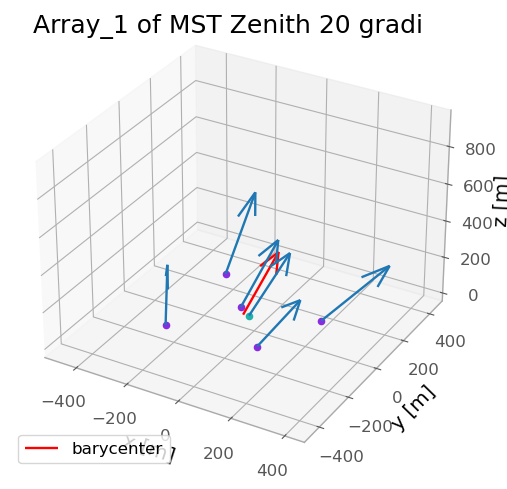

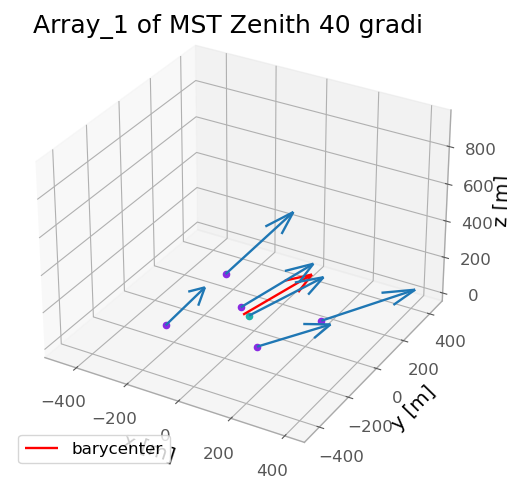

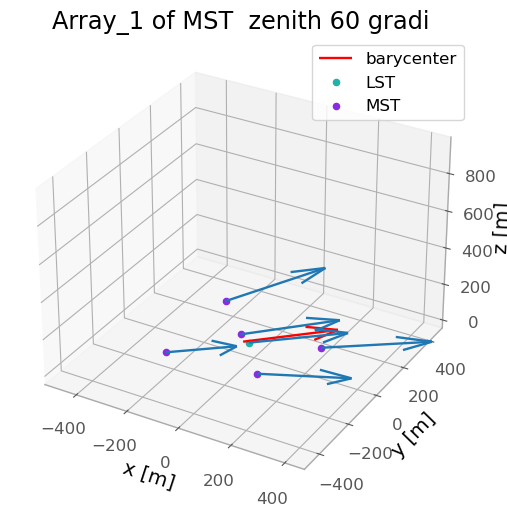

In [81]:
#array_alt_1.display("xyz")
#fig = plt.figure()
ax = array_alt_1_div_2.display("xyz")
ax_2 = array_alt_2_div_2.display("xyz")
ax_3 = array_alt_3_div_2.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_2 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels_2 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_3 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels_3 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}

#array_3.display("xyz",color=c,label=label)

for i in range(len(array_alt_1.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_alt_1.table['x'][i], array_alt_1.table['y'][i], array_alt_1.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='lower left')
ax.text2D(0.05, 0.95, "Array_1 of MST Zenith 20 gradi", 
          transform=ax.transAxes, fontsize=18)
plt.gcf().savefig("./array_ZENITH_20.png", dpi=300)

#SECOND ALTITUDE



for i in range(len(array_alt_2.table)):
    # Color each telescope point according to the FoV
    ax_2.scatter(array_alt_2.table['x'][i], array_alt_2.table['y'][i], array_alt_2.table['z'][i], 
               color=colors_2[i], label=fov_labels_2[colors_2[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
print(by_label)
ax_2.legend(by_label.values(), by_label.keys())
ax_2.text2D(0.05, 0.95, "Array_1 of MST Zenith 40 gradi", 
            transform=ax_2.transAxes, fontsize=18)
plt.gcf().savefig("./array_1_ZENITH_40.png", dpi=300)

#THIRD ALTITUDE


for i in range(len(array_alt_3.table)):
    # Color each telescope point according to the FoV
    ax_3.scatter(array_alt_3.table['x'][i], array_alt_3.table['y'][i], array_alt_3.table['z'][i], 
               color=colors_3[i], label=fov_labels_3[colors_3[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Array_1 of MST  zenith 60 gradi")
plt.gcf().savefig("./array_1_ZENITH_60.png", dpi=300)
plt.show()
##SST IN GREEN 

In [83]:
#array_alt_1.display("xyz")
#fig = plt.figure()
ax = array_2_alt_1_div_2.display("xyz")
ax_2 = array_2_alt_2_div_2.display("xyz")
ax_3 = array_2_alt_3_div_2.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_2 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels_2 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_3 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels_3 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}

#array_3.display("xyz",color=c,label=label)

for i in range(len(array_alt_1.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_2_alt_1_div_2.table['x'][i], array_2_alt_1_div_2.table['y'][i],array_2_alt_1_div_2.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='lower left')
ax.text2D(0.05, 0.95, "Array_2 of MST Zenith 20 gradi", 
          transform=ax.transAxes, fontsize=18)
plt.gcf().savefig("./array_ZENITH_20.png", dpi=300)

#SECOND ALTITUDE



for i in range(len(array_alt_2.table)):
    # Color each telescope point according to the FoV
    ax_2.scatter(array_2_alt_2_div_2.table['x'][i],array_2_alt_2_div_2.table['y'][i],array_2_alt_2_div_2.table['z'][i], 
               color=colors_2[i], label=fov_labels_2[colors_2[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
print(by_label)
ax_2.legend(by_label.values(), by_label.keys())
ax_2.text2D(0.05, 0.95, "Array_2 of MST Zenith 40 gradi", 
            transform=ax_2.transAxes, fontsize=18)
plt.gcf().savefig("./array_1_ZENITH_40.png", dpi=300)

#THIRD ALTITUDE


for i in range(len(array_alt_3.table)):
    # Color each telescope point according to the FoV
    ax_3.scatter(array_2_alt_3_div_2.table['x'][i], array_2_alt_3_div_2.table['y'][i],array_2_alt_3_div_2.table['z'][i], 
               color=colors_3[i], label=fov_labels_3[colors_3[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Array_2 of MST  zenith 60 gradi")
plt.gcf().savefig("./array_1_ZENITH_60.png", dpi=300)
plt.show()
##SST IN GREEN 

IndexError: index 5 is out of bounds for axis 0 with size 5

## DIV 3

{'barycenter': <mpl_toolkits.mplot3d.art3d.Line3DCollection object at 0x12871d760>}


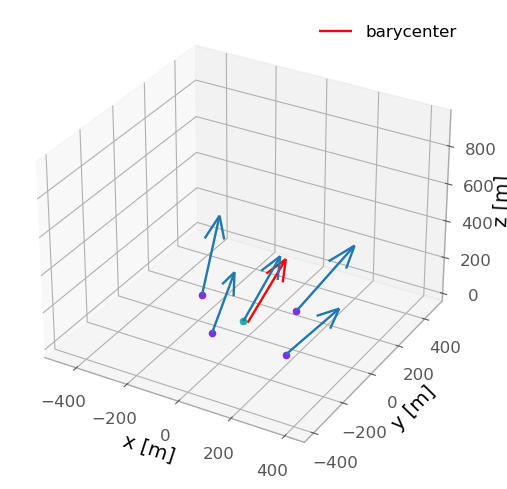

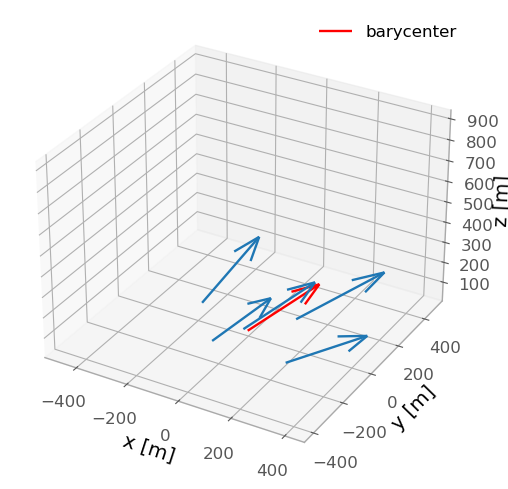

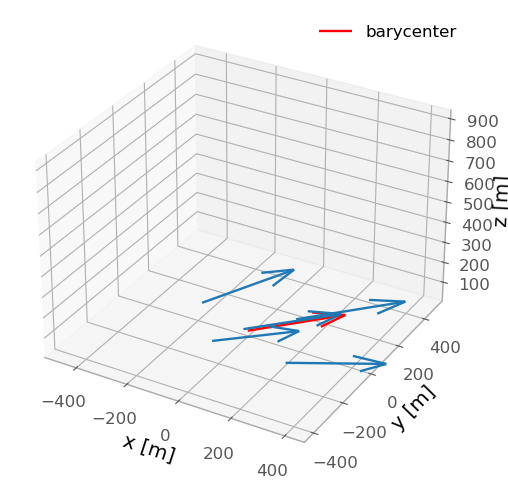

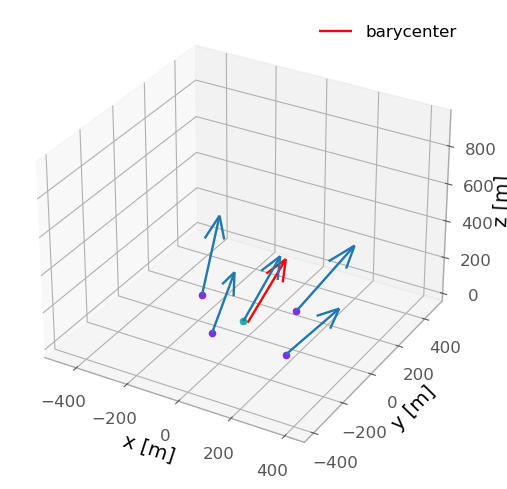

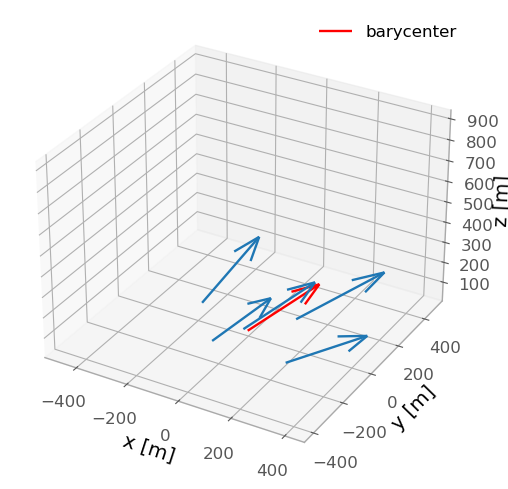

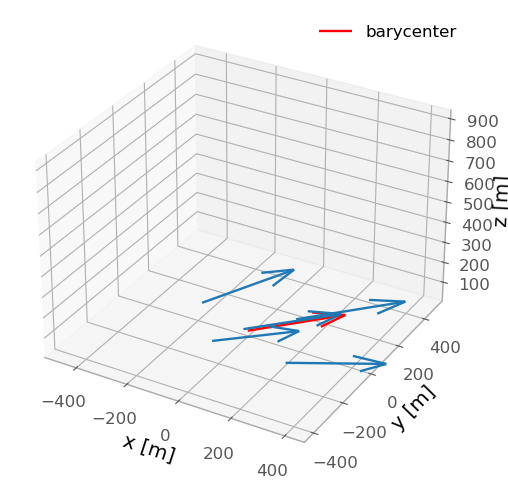

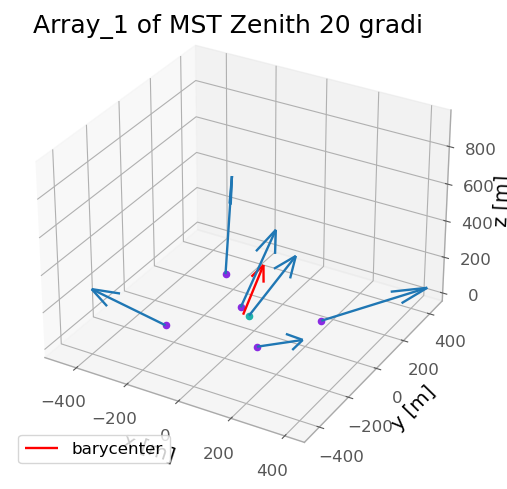

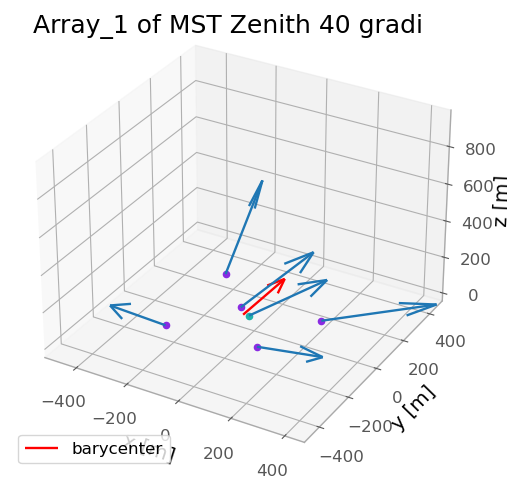

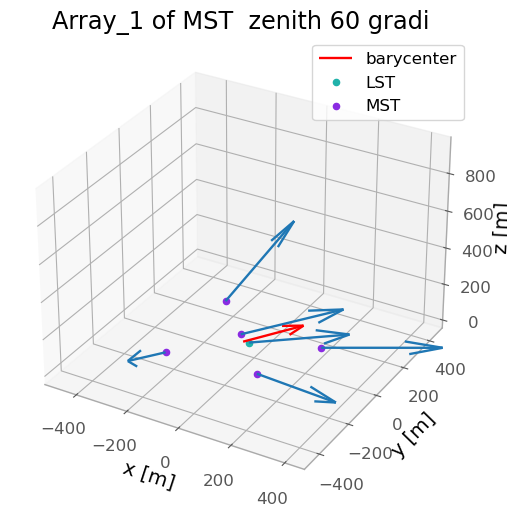

In [84]:
#array_alt_1.display("xyz")
#fig = plt.figure()
ax = array_alt_1_div_3.display("xyz")
ax_2 = array_alt_2_div_3.display("xyz")
ax_3 = array_alt_3_div_3.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_2 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels_2 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_3 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels_3 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}

#array_3.display("xyz",color=c,label=label)

for i in range(len(array_alt_1.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_alt_1_div_3.table['x'][i], array_alt_1_div_3.table['y'][i], array_alt_1_div_3.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='lower left')
ax.text2D(0.05, 0.95, "Array_1 of MST Zenith 20 gradi", 
          transform=ax.transAxes, fontsize=18)
plt.gcf().savefig("./array_ZENITH_20.png", dpi=300)

#SECOND ALTITUDE



for i in range(len(array_alt_2.table)):
    # Color each telescope point according to the FoV
    ax_2.scatter(array_alt_2_div_3.table['x'][i], array_alt_2_div_3.table['y'][i], array_alt_2_div_3.table['z'][i], 
               color=colors_2[i], label=fov_labels_2[colors_2[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
print(by_label)
ax_2.legend(by_label.values(), by_label.keys())
ax_2.text2D(0.05, 0.95, "Array_1 of MST Zenith 40 gradi", 
            transform=ax_2.transAxes, fontsize=18)
plt.gcf().savefig("./array_1_ZENITH_40.png", dpi=300)

#THIRD ALTITUDE


for i in range(len(array_alt_3.table)):
    # Color each telescope point according to the FoV
    ax_3.scatter(array_alt_3_div_3.table['x'][i], array_alt_3_div_3.table['y'][i], array_alt_3_div_3.table['z'][i], 
               color=colors_3[i], label=fov_labels_3[colors_3[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Array_1 of MST  zenith 60 gradi")
plt.gcf().savefig("./array_1_ZENITH_60.png", dpi=300)
plt.show()
##SST IN GREEN 

In [85]:
#array_alt_1.display("xyz")
#fig = plt.figure()
ax = array_2_alt_1_div_3.display("xyz")
ax_2 = array_2_alt_2_div_3.display("xyz")
ax_3 = array_2_alt_3_div_3.display("xyz")
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_2 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels_2 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_3 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels_3 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}

#array_3.display("xyz",color=c,label=label)

for i in range(len(array_alt_1.table)):
    # Color each telescope point according to the FoV
    ax.scatter(array_2_alt_1_div_3.table['x'][i], array_2_alt_1_div_3.table['y'][i], array_2_alt_1_div_3.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='lower left')
ax.text2D(0.05, 0.95, "Array_2 of MST Zenith 20 gradi", 
          transform=ax.transAxes, fontsize=18)
plt.gcf().savefig("./array_2_ZENITH_20.png", dpi=300)

#SECOND ALTITUDE



for i in range(len(array_alt_2.table)):
    # Color each telescope point according to the FoV
    ax_2.scatter(array_2_alt_2_div_3.table['x'][i], array_2_alt_2_div_3.table['y'][i],array_2_alt_2_div_3.table['z'][i], 
               color=colors_2[i], label=fov_labels_2[colors_2[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
print(by_label)
ax_2.legend(by_label.values(), by_label.keys())
ax_2.text2D(0.05, 0.95, "Array_2 of MST Zenith 40 gradi", 
            transform=ax_2.transAxes, fontsize=18)
plt.gcf().savefig("./array_2_ZENITH_40.png", dpi=300)

#THIRD ALTITUDE


for i in range(len(array_alt_3.table)):
    # Color each telescope point according to the FoV
    ax_3.scatter(array_2_alt_3_div_3.table['x'][i], array_2_alt_3_div_3.table['y'][i], array_2_alt_3_div_3.table['z'][i], 
               color=colors_3[i], label=fov_labels_3[colors_3[i]])

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Array_2 of MST  zenith 60 gradi")
plt.gcf().savefig("./array_2_ZENITH_60.png", dpi=300)
plt.show()
##SST IN GREEN 

IndexError: index 5 is out of bounds for axis 0 with size 5

In [87]:
div=[]

div=np.linspace(0,0.4, 40)

In [88]:
FoV_full_array=[]
multiplicity_full_array=[]
for divergence in div:
    full_array.divergent_pointing(divergence, az=0,alt=70)
    FoV=full_array.hFoV()[0]
    multiplicity=full_array.hFoV()[1]
    FoV_full_array.append(FoV)
    multiplicity_full_array.append(multiplicity)
  

100%|███████████████████████████████████████████| 14/14 [00:02<00:00,  6.27it/s]


In [89]:
FoV_array=[]
multiplicity_array=[]
i=0
for divergence in div:
    array.divergent_pointing(divergence, az=0,alt=70)
    FoV=hFoV_multiplicity(array, number_of_telescopes_subarray_1)[0]
    multiplicity=hFoV_multiplicity(array, number_of_telescopes_subarray_1)[1]
    FoV_array.append(FoV)
    multiplicity_array.append(multiplicity)
    i+=1    

100%|█████████████████████████████████████████████| 6/6 [00:00<00:00,  6.54it/s]


In [90]:
FoV_array_2=[]
multiplicity_array_2=[]
i=0
for divergence in div:
    array_2.divergent_pointing(divergence, az=0,alt=70)
    FoV=hFoV_multiplicity(array_2, number_of_telescopes_subarray_2)[0]
    multiplicity=hFoV_multiplicity(array_2, number_of_telescopes_subarray_2)[1]
    FoV_array_2.append(FoV)
    multiplicity_array_2.append(multiplicity)
    i+=1    

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00,  6.59it/s]


In [91]:
print(len(div), len(FoV_full_array), len(FoV_array))

40 40 40


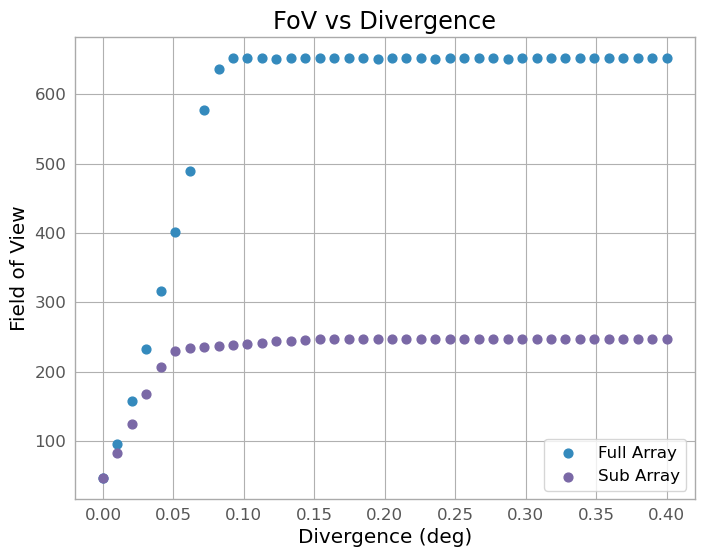

In [100]:
plt.scatter(div, FoV_full_array, label='Full Array', s=40)
plt.scatter(div, FoV_array, label='Sub Array', s=40)

# Add labels and title
plt.xlabel("Divergence (deg)")  
plt.ylabel("Field of View")  
plt.title("FoV vs Divergence")  

# Add legend
plt.legend()

# Display the plot
plt.show()

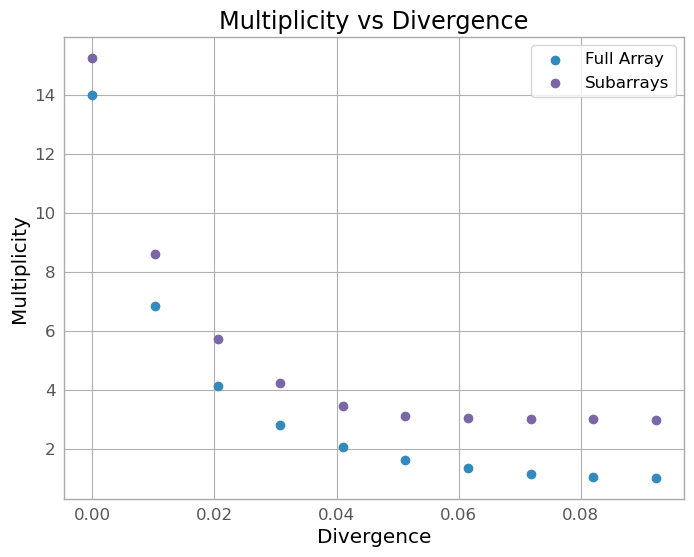

In [93]:
plt.scatter(div[:10], multiplicity_full_array[:10], label='Full Array')
plt.scatter(div[:10],  multiplicity_array[:10], label='Subarrays')
plt.xlabel("Divergence")  
plt.ylabel("Multiplicity")  # Y-axis label
plt.title("Multiplicity vs Divergence")  # Title of the plot
plt.legend()
plt.show()

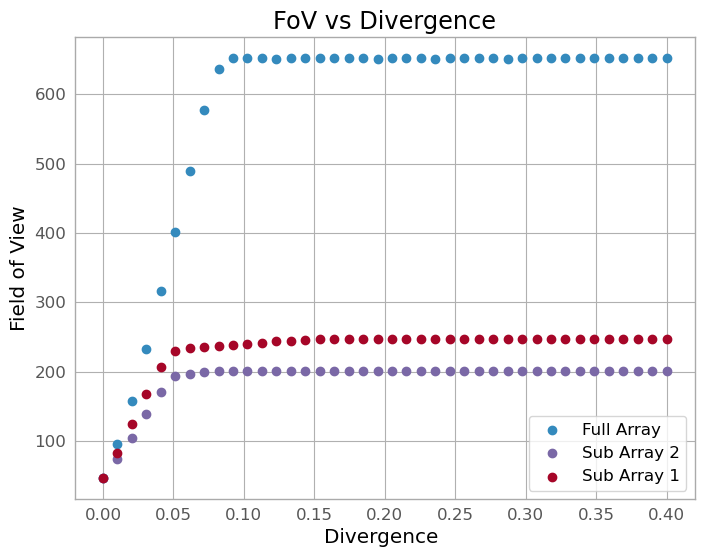

In [94]:
plt.scatter(div, FoV_full_array, label='Full Array')
plt.scatter(div, FoV_array_2, label='Sub Array 2')
plt.scatter(div, FoV_array, label='Sub Array 1')
plt.xlabel("Divergence ")  
plt.ylabel("Field of View")  
plt.title("FoV vs Divergence")  
plt.legend()

plt.show()

In [103]:
print(f"The FoV difference between subarray 1 and 2", np.mean(FoV_array)/np.mean(FoV_array_2))
print(f"The FoV differenve between subarray 1 and the full array is", np.mean(FoV_full_array)/np.mean(FoV_array) )
print(f"The FoV differenve between subarray 2 and the full array is", np.mean(FoV_full_array)/np.mean(FoV_array_2) )

The FoV difference between subarray 1 and 2 1.2189532545931303
The FoV differenve between subarray 1 and the full array is 2.5168001459766614
The FoV differenve between subarray 2 and the full array is 3.0678617290987167


In [105]:
FoV_array = np.array(FoV_array)
FoV_array_2 = np.array(FoV_array_2)

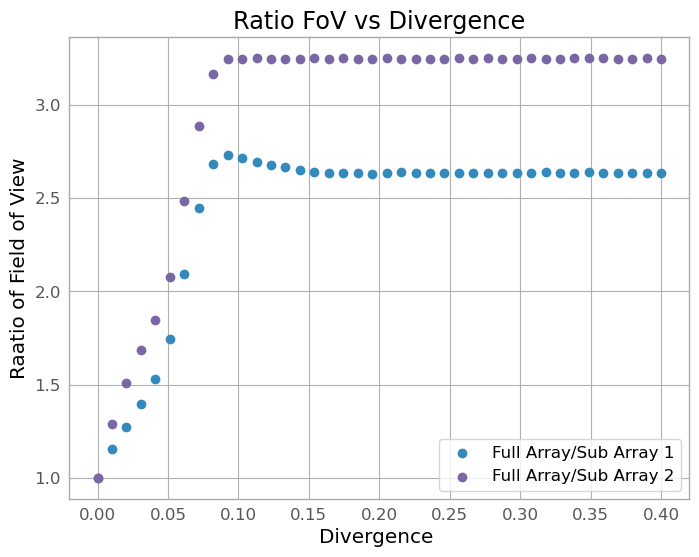

In [107]:

plt.scatter(div, FoV_full_array/FoV_array, label='Full Array/Sub Array 1')
plt.scatter(div, FoV_full_array/FoV_array_2, label='Full Array/Sub Array 2')

plt.xlabel("Divergence ")  
plt.ylabel("Raatio of Field of View")  
plt.title("Ratio FoV vs Divergence")  
plt.legend()

plt.show()

In [97]:
#hfov = hp.nside2pixarea(nside, True)*np.sum(mask_fov)
multiplicity_full_array[:10]

[14.0,
 6.838909541511772,
 4.119256924863161,
 2.795073670003374,
 2.0616771192424306,
 1.6247792241774057,
 1.3297012208181624,
 1.1301528801528802,
 1.0247777021311713,
 1.0004428608812932]

In [108]:
multiplicity_full_array = np.array(multiplicity_full_array)
multiplicity_array_2 = np.array(multiplicity_array_2)

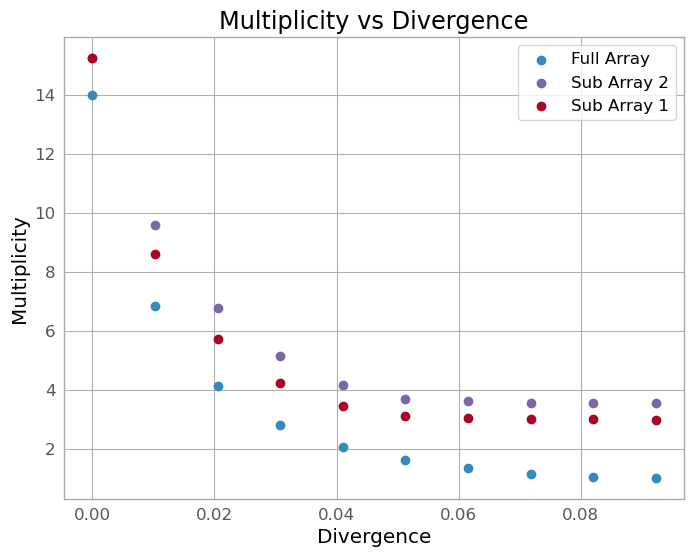

In [98]:
plt.scatter(div[:10], multiplicity_full_array[:10], label='Full Array')
plt.scatter(div[:10],  multiplicity_array_2[:10], label='Sub Array 2')
plt.scatter(div[:10],  multiplicity_array[:10], label='Sub Array 1')
plt.xlabel("Divergence")  
plt.ylabel("Multiplicity")  # Y-axis label
plt.title("Multiplicity vs Divergence")  # Title of the plot
plt.legend()
plt.show()

In [99]:
print(np.mean(multiplicity_array_2)/np.mean(multiplicity_array))

1.1886119139245848


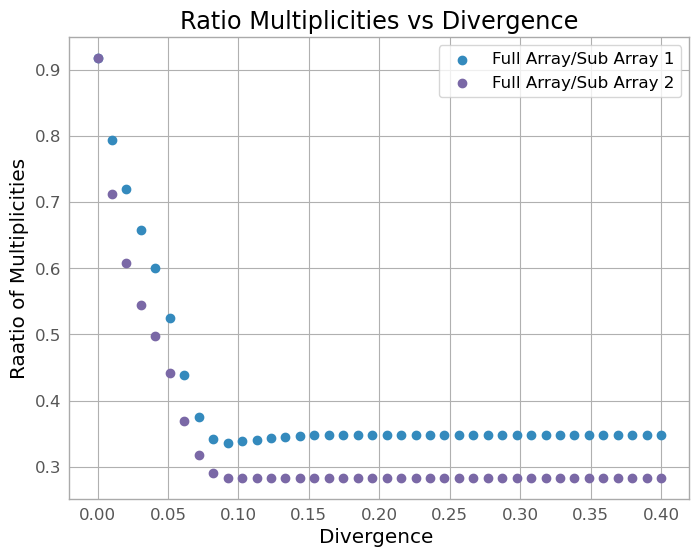

In [111]:
plt.scatter(div, multiplicity_full_array/multiplicity_array, label='Full Array/Sub Array 1')
plt.scatter(div, multiplicity_full_array/multiplicity_array_2, label='Full Array/Sub Array 2')

plt.xlabel("Divergence ")  
plt.ylabel("Raatio of Multiplicities")  
plt.title("Ratio Multiplicities vs Divergence")  
plt.legend()

plt.show()

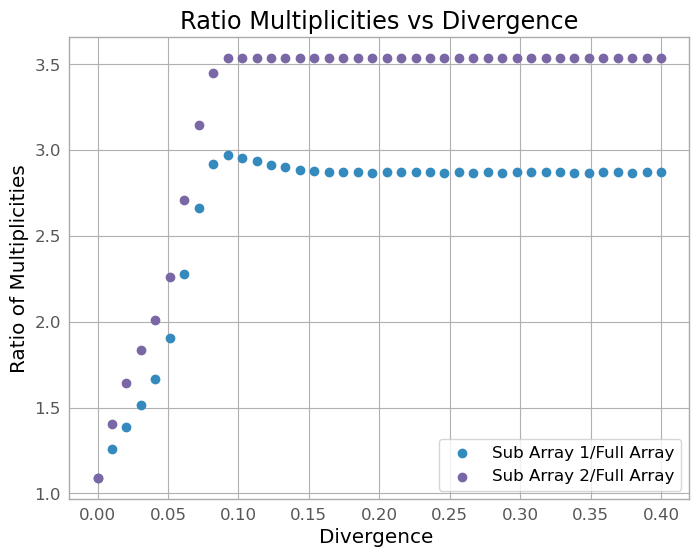

In [113]:
plt.scatter(div, multiplicity_array/multiplicity_full_array, label='Sub Array 1/Full Array')
plt.scatter(div, multiplicity_array_2/multiplicity_full_array, label='Sub Array 2/Full Array')

plt.xlabel("Divergence ")  
plt.ylabel("Ratio of Multiplicities")  
plt.title("Ratio Multiplicities vs Divergence")  
plt.legend()

plt.show()

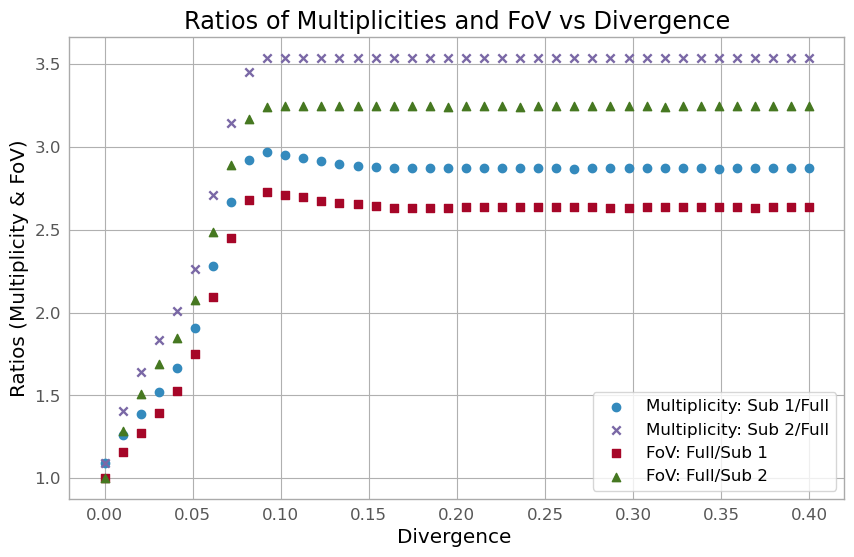

In [125]:
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size

# Scatter plots for Multiplicity ratios
plt.scatter(div, multiplicity_array/multiplicity_full_array, label='Multiplicity: Sub 1/Full', marker='o')
plt.scatter(div,  multiplicity_array_2/multiplicity_full_array, label='Multiplicity: Sub 2/Full', marker='x')

# Scatter plots for FoV ratios
plt.scatter(div, FoV_full_array / FoV_array, label='FoV: Full/Sub 1', marker='s')
plt.scatter(div, FoV_full_array / FoV_array_2, label='FoV: Full/Sub 2', marker='^')

# Add labels, title, and legend
plt.xlabel("Divergence ")  
plt.ylabel("Ratios (Multiplicity & FoV)")  
plt.title("Ratios of Multiplicities and FoV vs Divergence")  
plt.legend()

# Display the plot
plt.show()